In [1]:
from google.cloud import bigquery
import pandas as pd 
import chime   
import seaborn as sns
client = bigquery.Client("gcp-wow-rwds-ai-checkout-dev")

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None)

In [3]:
check = client.query(
"""
SELECT * 
FROM `gcp-wow-cart-data-dev-d4d7.davide.instore_screens_run_logs` 
WHERE query_step = "6"
    """
).result()
check_df = check.to_dataframe()
chime.success()
check_df

,campaign_id,query_step,query_type,query_start_time,query_end_time,query_duration_in_seconds,query_duration_in_minutes
0,WOW20008518,6,Total Runtime,2024-07-23 20:40:07.792381,2024-07-23 20:40:20.796570,218,3.633333
1,WOW20008634,6,Total Runtime,2024-07-23 20:43:08.016056,2024-07-23 20:43:25.626322,181,3.016667
2,WOW20006435,6,Total Runtime,2024-07-23 20:32:49.479780,2024-07-23 20:33:01.979305,302,5.033333
3,WOW20008167,6,Total Runtime,2024-07-23 20:53:11.302265,2024-07-23 20:53:23.368186,186,3.100000
4,WOW20008535,6,Total Runtime,2024-07-23 20:49:59.857431,2024-07-23 20:50:13.463805,187,3.116667
5,WOW20008400,6,Total Runtime,2024-07-23 20:36:26.370139,2024-07-23 20:36:38.680584,212,3.533333
6,WOW20008321,6,Total Runtime,2024-07-23 20:46:50.157454,2024-07-23 20:47:02.341948,212,3.533333
7,WOW20007878,6,Total Runtime,2024-07-23 19:43:27.096238,2024-07-23 19:43:38.829936,281,4.683333
8,WOW20008514,6,Total Runtime,2024-07-23 19:38:42.966582,2024-07-23 19:38:54.475119,312,5.200000
9,WOW20008380,6,Total Runtime,2024-07-23 19:51:47.515963,2024-07-23 19:52:04.768629,231,3.850000


In [4]:

check = client.query(
"""
    SELECT
        res.*, 
        n_days.n_days_campaign_period, 
        n_days.n_days_pre_period + 1, 

        baskets_test.total_baskets_pre_period AS test_store_baskets_pre_period, 
        baskets_test.total_baskets_campaign_period AS test_store_baskets_campaign_period,
        baskets_control.total_baskets_pre_period AS control_store_baskets_pre_period, 
        baskets_control.total_baskets_campaign_period AS control_store_baskets_campaign_period,

        baskets_test.total_baskets_pre_period / n_days.n_days_pre_period AS test_store_transactions_per_day_pre_period,
        baskets_test.total_baskets_campaign_period / n_days.n_days_pre_period AS test_store_transactions_per_day_campaign_period,

        baskets_control.total_baskets_pre_period / n_days.n_days_pre_period AS control_store_transactions_per_day_pre_period,
        baskets_control.total_baskets_campaign_period / n_days.n_days_pre_period AS control_store_transactions_per_day_campaign_period


        
    FROM gcp-wow-cart-data-dev-d4d7.davide.instore_digital_screens_comparisons_store_level res
    LEFT JOIN (SELECT campaign_id, MAX(n_days_campaign_period) AS n_days_campaign_period, MAX(n_days_pre_period) AS n_days_pre_period FROM gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period GROUP BY 1) n_days
        ON res.campaign_id = n_days.campaign_id
    LEFT JOIN gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period AS baskets_test 
        ON baskets_test.campaign_id = res.campaign_id 
        AND baskets_test.Site = res.test_store 
    LEFT JOIN gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period AS baskets_control 
        ON baskets_control.campaign_id = res.campaign_id 
        AND baskets_control.Site = res.control_store 

    """
).result()
check_df = check.to_dataframe()
chime.success()
check_df

,campaign_id,campaign_start_date,campaign_end_date,test_store,control_store,test_store_uplift,control_store_uplift,uplift_effect,test_store_pre_sales,test_store_campaign_sales,control_store_pre_sales,control_store_campaign_sales,similarity_ranking,n_comparison_campaign_ids,n_days_campaign_period,f0_,test_store_baskets_pre_period,test_store_baskets_campaign_period,control_store_baskets_pre_period,control_store_baskets_campaign_period,test_store_transactions_per_day_pre_period,test_store_transactions_per_day_campaign_period,control_store_transactions_per_day_pre_period,control_store_transactions_per_day_campaign_period
0,WOW20008621,2024-01-17,2024-01-23,3399,3289,4.989949749,0.696428571,4.293521178,41.790000000,250.320000000,84.000000000,142.500000000,4,36,7,6,2,18,4,11,0.400000,3.600000,0.800000,2.200000
1,WOW20008621,2024-01-17,2024-01-23,5680,3289,0.404756710,0.696428571,-0.291671861,91.660000000,128.760000000,84.000000000,142.500000000,4,2,7,6,3,9,4,11,0.600000,1.800000,0.800000,2.200000
2,WOW20008621,2024-01-17,2024-01-23,3250,3289,3.388400703,0.696428571,2.691972132,62.590000000,274.670000000,84.000000000,142.500000000,2,26,7,6,3,21,4,11,0.600000,4.200000,0.800000,2.200000
3,WOW20008621,2024-01-17,2024-01-23,3183,3114,0.485659656,1.450946096,-0.965286440,83.680000000,124.320000000,62.890000000,154.140000000,2,7,7,6,4,10,3,11,0.800000,2.000000,0.600000,2.200000
4,WOW20008621,2024-01-17,2024-01-23,1557,3146,4.194990724,0.660898876,3.534091848,53.900000000,280.010000000,89.000000000,147.820000000,3,3,7,6,3,19,4,10,0.600000,3.800000,0.800000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7458,WOW20008165,2024-01-17,2024-01-23,1208,1294,6.584117647,1.092171802,5.491945845,17.000000000,128.930000000,148.310000000,310.290000000,2,17,7,8,1,12,10,19,0.142857,1.714286,1.428571,2.714286
7459,WOW20008455,2024-01-17,2024-01-23,1208,1347,0.060228276,-0.160692419,0.220920695,294.380000000,312.110000000,179.660000000,150.790000000,1,37,7,8,23,27,14,13,3.285714,3.857143,2.000000,1.857143
7460,WOW20007878,2024-01-17,2024-01-23,1208,1347,0.238801961,0.171945787,0.066856174,1042.370000000,1291.290000000,529.760000000,620.850000000,1,37,7,8,55,104,29,50,7.857143,14.857143,4.142857,7.142857
7461,WOW20008322,2024-01-17,2024-01-23,1208,1347,0.102104113,0.018715838,0.083388275,1747.530000000,1925.960000000,1591.700000000,1621.490000000,1,37,7,8,157,153,124,113,22.428571,21.857143,17.714286,16.142857


In [5]:

check = client.query(
"""

with step_one AS (
    SELECT 

        res.*, 
        n_days.n_days_campaign_period, 
        n_days.n_days_pre_period, 

        baskets_test.total_baskets_pre_period AS test_store_baskets_pre_period, 
        baskets_test.total_baskets_campaign_period AS test_store_baskets_campaign_period,
        baskets_control.total_baskets_pre_period AS control_store_baskets_pre_period, 
        baskets_control.total_baskets_campaign_period AS control_store_baskets_campaign_period,

        baskets_test.total_baskets_pre_period / n_days.n_days_pre_period AS test_store_transactions_per_day_pre_period,
        baskets_test.total_baskets_campaign_period / n_days.n_days_pre_period AS test_store_transactions_per_day_campaign_period,

        baskets_control.total_baskets_pre_period / n_days.n_days_pre_period AS control_store_transactions_per_day_pre_period,
        baskets_control.total_baskets_campaign_period / n_days.n_days_pre_period AS control_store_transactions_per_day_campaign_period


        
    FROM gcp-wow-cart-data-dev-d4d7.davide.instore_digital_screens_comparisons_store_level res
    LEFT JOIN (SELECT campaign_id, MAX(n_days_campaign_period) AS n_days_campaign_period, MAX(n_days_pre_period) AS n_days_pre_period FROM gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period GROUP BY 1) n_days
        ON res.campaign_id = n_days.campaign_id
    LEFT JOIN gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period AS baskets_test 
        ON baskets_test.campaign_id = res.campaign_id 
        AND baskets_test.Site = res.test_store 
    LEFT JOIN gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period AS baskets_control 
        ON baskets_control.campaign_id = res.campaign_id 
        AND baskets_control.Site = res.control_store 
),

step_two AS (

    SELECT DISTINCT *
    FROM step_one 
    
    WHERE 
        test_store_transactions_per_day_pre_period >= 10
    AND 
        test_store_transactions_per_day_campaign_period >= 10
    AND 
        control_store_transactions_per_day_pre_period >= 10
    AND 
        control_store_transactions_per_day_campaign_period >= 10
    
),
step_three AS (

    SELECT 
        campaign_id, 
        n_days_pre_period + 1 AS n_days_pre_period,
        n_days_campaign_period,
        COUNT(DISTINCT test_store) AS n_test_stores,
        COUNT(DISTINCT control_store) AS n_control_stores,
        --AVG(test_store_transactions_per_day_pre_period) avg_pre_period_test_transactions_pspd,
        --AVG(control_store_transactions_per_day_pre_period) avg_pre_period_control_transactions_pspd,
        --AVG(test_store_transactions_per_day_campaign_period) avg_campaign_period_test_transactions_pspd,
        --AVG(control_store_transactions_per_day_campaign_period) avg_campaign_period_control_transactions_pspd,
        AVG(uplift_effect) AS avg_uplift_effect
    FROM step_two 
    GROUP BY 1,2,3
)
SELECT *, 
    CASE WHEN n_control_stores >= 100 AND (avg_uplift_effect >= 0.01 OR avg_uplift_effect <= -0.01) THEN "1" ELSE "0" END AS attributable_to_campaign
FROM step_three
    """
).result()
check_df = check.to_dataframe()
chime.success()
check_df

,campaign_id,n_days_pre_period,n_days_campaign_period,n_test_stores,n_control_stores,avg_uplift_effect,attributable_to_campaign
0,WOW20007078,15,14,79,58,-0.006396856,0
1,WOW20005828,7,7,133,104,0.007695955,0
2,WOW20007431,35,35,86,59,0.002578553,0
3,WOW20007461,35,35,12,13,-0.014285578,0
4,WOW20008109,35,35,1,1,-0.106751796,0
5,WOW20007430,35,35,190,153,0.011682263,1
6,WOW20006679,28,28,7,6,0.016575321,0
7,WOW20006501,35,35,102,79,0.005100382,0
8,WOW20007085,35,35,450,181,-0.014447303,1
9,WOW20007136,35,35,230,162,0.015656357,1


In [47]:

check = client.query(
"""

with step_one AS (
    SELECT DISTINCT 

        res.*, 
        n_days.n_days_campaign_period, 
        n_days.n_days_pre_period, 

        baskets_test.total_baskets_pre_period AS test_store_baskets_pre_period, 
        baskets_test.total_baskets_campaign_period AS test_store_baskets_campaign_period,
        baskets_control.total_baskets_pre_period AS control_store_baskets_pre_period, 
        baskets_control.total_baskets_campaign_period AS control_store_baskets_campaign_period,

        baskets_test.total_baskets_pre_period / n_days.n_days_pre_period AS test_store_transactions_per_day_pre_period,
        baskets_test.total_baskets_campaign_period / n_days.n_days_pre_period AS test_store_transactions_per_day_campaign_period,

        baskets_control.total_baskets_pre_period / n_days.n_days_pre_period AS control_store_transactions_per_day_pre_period,
        baskets_control.total_baskets_campaign_period / n_days.n_days_pre_period AS control_store_transactions_per_day_campaign_period


        
    FROM gcp-wow-cart-data-dev-d4d7.davide.instore_digital_screens_comparisons_store_level res
    LEFT JOIN (SELECT campaign_id, MAX(n_days_campaign_period) AS n_days_campaign_period, MAX(n_days_pre_period) AS n_days_pre_period FROM gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period GROUP BY 1) n_days
        ON res.campaign_id = n_days.campaign_id
    LEFT JOIN gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period AS baskets_test 
        ON baskets_test.campaign_id = res.campaign_id 
        AND baskets_test.Site = res.test_store 
    LEFT JOIN gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period AS baskets_control 
        ON baskets_control.campaign_id = res.campaign_id 
        AND baskets_control.Site = res.control_store 
),

one_control_obs AS (
    SELECT
        campaign_id, 
        test_store,
        control_store, 
        ROW_NUMBER() OVER(PARTITION BY campaign_id, control_store ORDER BY control_store) AS n_control_obs 
    FROM step_one
),

one_control_obs_filtered AS (
    SELECT * FROM one_control_obs WHERE n_control_obs = 1
),

step_two AS (

    SELECT DISTINCT step_one.*
    FROM step_one 
    LEFT JOIN one_control_obs_filtered
        ON step_one.campaign_id = one_control_obs_filtered.campaign_id 
        AND step_one.test_store = one_control_obs_filtered.test_store
        AND step_one.control_store = one_control_obs_filtered.control_store 
    
    WHERE 
        test_store_transactions_per_day_pre_period >= 10
    AND 
        test_store_transactions_per_day_campaign_period >= 10
    AND 
        control_store_transactions_per_day_pre_period >= 10
    AND 
        control_store_transactions_per_day_campaign_period >= 10
    AND one_control_obs_filtered.n_control_obs = 1
    
),
step_three AS (

    SELECT 
        campaign_id, 
        n_days_pre_period + 1 AS n_days_pre_period,
        n_days_campaign_period,
        COUNT(DISTINCT test_store) AS n_test_stores,
        COUNT(DISTINCT control_store) AS n_control_stores,
        AVG(uplift_effect) AS avg_uplift_effect
    FROM step_two 
    GROUP BY 1,2,3
),
step_four AS (
    SELECT *, 
        CASE WHEN n_control_stores >= 100 AND (avg_uplift_effect >= 0.01 OR avg_uplift_effect <= -0.01) THEN "1" ELSE "0" END AS attributable_to_campaign
    FROM step_three
)
SELECT * FROM step_four WHERE attributable_to_campaign = "1"
    """
).result()
check_df = check.to_dataframe()
chime.success()
check_df

,campaign_id,n_days_pre_period,n_days_campaign_period,n_test_stores,n_control_stores,avg_uplift_effect,attributable_to_campaign
0,WOW20007136,35,35,157,162,0.014427866,1
1,WOW20007605,56,56,184,191,0.014322366,1
2,WOW20007647_Magnum,56,56,127,130,0.024833438,1
3,WOW20007605_Bulla,56,56,185,192,0.016391309,1


In [68]:

check = client.query(
"""

with step_one AS (
    SELECT DISTINCT 

        res.*, 
        n_days.n_days_campaign_period, 
        n_days.n_days_pre_period, 

        baskets_test.total_baskets_pre_period AS test_store_baskets_pre_period, 
        baskets_test.total_baskets_campaign_period AS test_store_baskets_campaign_period,
        baskets_control.total_baskets_pre_period AS control_store_baskets_pre_period, 
        baskets_control.total_baskets_campaign_period AS control_store_baskets_campaign_period,

        baskets_test.total_baskets_pre_period / n_days.n_days_pre_period AS test_store_transactions_per_day_pre_period,
        baskets_test.total_baskets_campaign_period / n_days.n_days_pre_period AS test_store_transactions_per_day_campaign_period,

        baskets_control.total_baskets_pre_period / n_days.n_days_pre_period AS control_store_transactions_per_day_pre_period,
        baskets_control.total_baskets_campaign_period / n_days.n_days_pre_period AS control_store_transactions_per_day_campaign_period


        
    FROM gcp-wow-cart-data-dev-d4d7.davide.instore_digital_screens_comparisons_store_level res
    LEFT JOIN (SELECT campaign_id, MAX(n_days_campaign_period) AS n_days_campaign_period, MAX(n_days_pre_period) AS n_days_pre_period FROM gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period GROUP BY 1) n_days
        ON res.campaign_id = n_days.campaign_id
    LEFT JOIN gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period AS baskets_test 
        ON baskets_test.campaign_id = res.campaign_id 
        AND baskets_test.Site = res.test_store 
    LEFT JOIN gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period AS baskets_control 
        ON baskets_control.campaign_id = res.campaign_id 
        AND baskets_control.Site = res.control_store 
),

one_control_obs AS (
    SELECT
        campaign_id, 
        test_store,
        control_store, 
        ROW_NUMBER() OVER(PARTITION BY campaign_id, control_store ORDER BY control_store) AS n_control_obs 
    FROM step_one
),

one_control_obs_filtered AS (
    SELECT * FROM one_control_obs WHERE n_control_obs = 1
),
store_level AS (
    SELECT DISTINCT step_one.*
    FROM step_one 
    LEFT JOIN one_control_obs_filtered
        ON step_one.campaign_id = one_control_obs_filtered.campaign_id 
        AND step_one.test_store = one_control_obs_filtered.test_store
        AND step_one.control_store = one_control_obs_filtered.control_store 
    
    WHERE 
        
        test_store_transactions_per_day_pre_period >= 10
    AND 
        test_store_transactions_per_day_campaign_period >= 10
    AND 
        control_store_transactions_per_day_pre_period >= 10
    AND 
        control_store_transactions_per_day_campaign_period >= 10
    
    AND one_control_obs_filtered.n_control_obs = 1

    --AND DATE_TRUNC(campaign_start_date, MONTH) NOT IN ("2024-01-01", "2023-12-01")
),
aggregated AS (
    SELECT 
        campaign_id, 
        SUM(test_store_pre_sales) AS test_store_pre_sales_sum,
        SUM(test_store_campaign_sales) AS test_store_campaign_sales_sum,
        SUM(control_store_pre_sales) AS control_store_pre_sales_sum, 
        SUM(control_store_campaign_sales) AS control_store_campaign_sales_sum 
    FROM store_level
    GROUP BY 1
) 
, agg_uplift AS (
    SELECT 
        campaign_id, 
        test_store_campaign_sales_sum - test_store_pre_sales_sum AS test_stores_uplift,
        control_store_campaign_sales_sum - control_store_pre_sales_sum AS control_stores_uplift
    FROM aggregated
)
SELECT 
    campaign_id, 
    (test_stores_uplift / control_stores_uplift) - 1
FROM agg_uplift
    """
).result()
check_df = check.to_dataframe()
chime.success()
check_df

,campaign_id,f0_
0,WOW20007078,-0.092699205
1,WOW20007136,-0.080574211
2,WOW20007085,-0.210119766
3,WOW20007647,0.194929534
4,WOW20008322,0.166143952
5,WOW20007647_Magnum,0.340010782
6,WOW20007430,-0.342819260
7,WOW20007605_Bulla,-0.108088202
8,WOW20009322,-0.015209251
9,WOW20005828,-0.079900560


In [12]:

check = client.query(
"""
with step_one AS (
    SELECT 
        *, 
        ROW_NUMBER() OVER(PARTITION BY campaign_id, control_store ORDER BY control_store) AS n_control_store_occurrence,
        ROW_NUMBER() OVER(PARTITION BY campaign_id, test_store ORDER BY test_store) AS n_test_store_occurrence
    FROM gcp-wow-cart-data-dev-d4d7.davide.digital_screens_store_comparisons_plus_baseline_2
    ORDER BY media_start_date DESC
), step_two AS (
SELECT 
    *
FROM step_one 
WHERE n_control_store_occurrence = 1
AND n_test_store_occurrence = 1
)
SELECT 
    campaign_id, 
    step_two.media_start_date,
    step_two.media_end_date,
    ARRAY_AGG(DISTINCT skus ORDER BY skus) AS skus,
    ARRAY_LENGTH(ARRAY_AGG(DISTINCT skus)) AS n_skus,
    COUNT(DISTINCT test_store) AS n_test_stores,
    COUNT(DISTINCT control_store) AS n_control_stores,
    AVG(uplift_effect) AS avg_uplift,
    AVG(CASE WHEN significance = "Significant" THEN uplift_effect ELSE NULL END) AS avg_significant_uplift,
    STDDEV(uplift_effect) AS stddev_uplift,
    MIN(uplift_effect) AS min_uplift,
    MAX(uplift_effect) AS max_uplift
FROM step_two
LEFT JOIN gcp-wow-cart-data-dev-d4d7.davide.instore_screens_campaigns_june_2023_onwards_2 campaign_info_skus
    ON campaign_info_skus.booking_and_asset_number = step_two.campaign_id,
UNNEST(SPLIT(quoteline_skus_string, ",")) AS skus
GROUP BY 1,2,3
ORDER BY campaign_id
"""
).result()
check_df = check.to_dataframe()
chime.success()
check_df

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,campaign_id,media_start_date,media_end_date,skus,n_skus,n_test_stores,n_control_stores,avg_uplift,avg_significant_uplift,stddev_uplift,min_uplift,max_uplift
0,WOW20000332_1,2023-05-03,2023-05-09,"[124806, 167104, 167310, 167328, 167330, 167374, 167408, 167430, 167552, 203814, 205099, 276843, 276959, 508826, 508827, 509491, 622935, 622945, 660435, 862414, 922679]",21,222,222,0.198023009,None,1.573176,-5.225377982,8.616409423
1,WOW20000382_1,2023-04-19,2023-04-25,"[123956, 13834, 156241, 166947, 170467, 197074, 204681, 204818, 204826, 242768, 276195, 331445, 331448, 360392, 374976, 44499, 44934, 75073, 751890, 751971, 83841]",21,66,66,0.083534970,None,0.691666,-1.652711270,1.606646698
2,WOW20000382_2,2023-04-26,2023-05-02,"[123956, 13834, 156241, 166947, 170467, 197074, 204681, 204818, 204826, 242768, 276195, 331445, 331448, 360392, 374976, 44499, 44934, 75073, 751890, 751971, 83841]",21,47,47,-0.058519116,None,0.188650,-0.437720881,0.325925386
3,WOW20000487_1,2023-04-12,2023-04-18,"[119674, 122672, 150927, 220954, 277299, 277810, 278218, 51739]",8,86,86,-0.340940061,-33.764369920,5.018340,-33.764369920,9.391654186
4,WOW20000487_2,2023-04-19,2023-04-25,"[119674, 122672, 150927, 220954, 277299, 277810, 278218, 51739]",8,63,63,-0.065863008,None,0.206365,-0.597233604,0.374179085
5,WOW20000542_1,2023-05-03,2023-05-09,"[104498, 106438, 106441, 106519, 106530, 106531, 107711, 108069, 108349, 108392, 108413, 108432, 108462, 164545, 164586, 17480, 17481, 17504, 17508, 229107, 229245, 229374, 229466, 229633, 24456, 24458, 24459, 24460, 24463, 24465, 660182, 660185, 660225, 660239, 660251, 660254]",36,84,84,-4.008965681,-9.635075061,26.472573,-188.471971150,58.254180325
6,WOW20000590_1,2023-04-19,2023-04-25,"[196105, 196144, 196153, 196164, 196524, 196879, 196997, 196998, 197099, 197128, 197353, 197386, 197656, 197743, 197746, 208889]",16,37,37,0.949999634,3.130008501,3.652050,-6.557152100,16.290633207
7,WOW20000860_1,2023-04-12,2023-04-18,"[10044, 196744, 196745, 377097, 377099, 640061, 684927, 724069, 724078, 783717, 839570]",11,44,44,1.463875608,14.822751080,6.029916,-4.750143578,36.091228239
8,WOW20000913_1,2023-04-12,2023-04-18,"[119793, 119833, 119985, 120022, 120032, 120062, 140777, 168995, 168997, 239469, 276040, 308409, 337864, 342853, 376108, 57127, 633067, 688099, 688220, 82587, 932580]",21,94,94,2.577584168,7.770372027,13.827401,-59.553972187,64.291520789
9,WOW20000942_1,2023-05-03,2023-05-09,"[136616, 142455, 190087, 191713, 191714, 236714, 236771, 237583, 264159, 264166, 264213, 264215, 265163, 265402, 267304, 272132, 78648, 78649, 78657, 78659, 78662, 78823, 79095]",23,62,62,0.390977328,0.170383083,4.576224,-17.048636829,13.185712634


In [69]:

check = client.query(
"""
with step_one AS (
    SELECT 
        *, 
        ROW_NUMBER() OVER(PARTITION BY campaign_id, control_store ORDER BY control_store) AS n_control_store_occurrence,
        ROW_NUMBER() OVER(PARTITION BY campaign_id, test_store ORDER BY control_store) AS n_test_store_occurrence
    FROM gcp-wow-cart-data-dev-d4d7.davide.digital_screens_store_comparisons_plus_baseline_3
    ORDER BY media_start_date DESC
)
    SELECT 
        *,
        (control_store_stddev_sales_amount / ABS(control_store_raw_uplift)) - 1 AS control_raw_std_dev_as_perc_of_uplift,
        (test_store_stddev_sales_amount / ABS(test_store_raw_uplift)) - 1 AS test_raw_std_dev_as_perc_of_uplift,
        control_store_raw_uplift - (control_store_raw_uplift * ((control_store_stddev_sales_amount / ABS(control_store_raw_uplift)))) AS control_uplift_reduced_by_control_std_dev,
        test_store_raw_uplift - (test_store_raw_uplift * ((test_store_stddev_sales_amount / ABS(test_store_raw_uplift)))) AS test_uplift_reduced_by_test_std_dev
    FROM step_one 
    WHERE n_control_store_occurrence = 1
    AND n_test_store_occurrence = 1


"""
).result()
check_df = check.to_dataframe()
chime.success()
check_df

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,campaign_id,media_start_date,media_end_date,test_store,control_store,test_store_perc_uplift,control_store_perc_uplift,test_store_raw_uplift,control_store_raw_uplift,test_store_pre_sales,control_store_pre_sales,test_store_campaign_sales,control_store_campaign_sales,similarity_ranking,n_comparison_campaign_ids,comparison_campaign_start_date,max_comparison_campaign_start_date,max_n_comparison_campaign_ids,test_store_mean_transactions,test_store_stddev_transactions,test_store_stddev_sales_amount,test_store_variance_transactions,control_store_mean_transactions,control_store_stddev_transactions,control_store_stddev_sales_amount,control_store_variance_transactions,perc_uplift_effect,raw_uplift_effect,significance,n_control_store_occurrence,n_test_store_occurrence,control_raw_std_dev_as_perc_of_uplift,test_raw_std_dev_as_perc_of_uplift,control_uplift_reduced_by_control_std_dev,test_uplift_reduced_by_test_std_dev
0,WOW20002217_1,2023-04-19,2023-04-25,1331,1175,1.184846036,1.387323740,791.880000000,479.140000000,668.340000000,345.370000000,1460.220000000,824.510000000,2,2,2023-03-29,2023-03-29,2,73.538462,40.598882,662.061657,1648.269231,63.923077,34.259941,421.264373,1173.743590,-0.202477704,312.740000000,Not Significant,1,1,-0.120791,-0.163937,57.875627,129.818343
1,WOW20002544_1,2023-04-19,2023-04-25,1621,1282,0.080009066,0.214494586,14.120000000,108.560000000,176.480000000,506.120000000,190.600000000,614.680000000,1,2,2023-03-29,2023-03-29,2,24.846154,8.706761,64.159924,75.807692,63.461538,14.512152,113.808763,210.602564,-0.134485520,-94.440000000,Significant,1,1,0.048349,3.543904,-5.248763,-50.039924
2,WOW20002544_1,2023-04-19,2023-04-25,3209,3304,0.032606155,0.257310242,8.370000000,250.350000000,256.700000000,972.950000000,265.070000000,1223.300000000,3,3,2023-03-29,2023-03-29,3,54.230769,16.052798,116.416026,257.692308,138.846154,46.879004,314.635400,2197.641026,-0.224704087,-241.980000000,Significant,1,1,0.256782,12.908725,-64.285400,-108.046026
3,WOW20003406_1,2023-04-19,2023-04-25,1648,7216,-0.121801092,-0.528616169,-40.170000000,-190.730000000,329.800000000,360.810000000,289.630000000,170.080000000,3,1,2023-03-22,2023-03-22,1,18.000000,7.560864,63.492723,57.166667,15.538462,6.590592,59.863352,43.435897,0.406815077,150.560000000,Significant,1,1,-0.686136,0.580601,-130.866648,23.322723
4,WOW20000382_1,2023-04-19,2023-04-25,5691,5652,0.444611286,0.656206520,275.370000000,792.330000000,619.350000000,1207.440000000,894.720000000,1999.770000000,1,2,2023-03-29,2023-03-29,2,91.230769,33.401981,193.606883,1115.692308,149.307692,41.781943,239.898937,1745.730769,-0.211595234,-516.960000000,Significant,1,1,-0.697223,-0.296921,552.431063,81.763117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,WOW20000487_1,2023-04-12,2023-04-18,2661,7010,4.143101837,12.137060932,532.140000000,846.560000000,128.440000000,69.750000000,660.580000000,916.310000000,1,2,2023-03-29,2023-03-29,2,61.307692,53.157603,283.526702,2825.730769,78.230769,49.633916,261.781409,2463.525641,-7.993959095,-314.420000000,Significant,1,1,-0.690770,-0.467195,584.778591,248.613298
1026,WOW20000913_1,2023-04-12,2023-04-18,2623,2669,4.466171902,1.933289220,258.770000000,321.390000000,57.940000000,166.240000000,316.710000000,487.630000000,1,2,2023-03-29,2023-03-29,2,8.769231,6.572085,69.946133,43.192308,14.538462,12.758105,139.598646,162.769231,2.532882682,-62.620000000,Not Significant,1,1,-0.565641,-0.729698,181.791354,188.823867
1027,WOW20001942_1,2023-04-12,2023-04-18,4337,2606,0.667115903,2.287270642,24.750000000,39.890000000,37.100000000,17.440000000,61.850000000,57.330000000,2,4,2023-03-29,2023-03-29,4,4.750000,4.787136,23.760510,22.916667,3.333333,2.081666,14.515634,4.333333,-1.620154739,-15.140000000,Significant,1,1,-0.636108,-0.039979,25.374366,0.989490
1028,WOW20002425_2,2023-04-12,2023-04-18,1415,2648,0.427739023,0.486471673,52.120000000,97.630000000,121.850000000,200.6

In [76]:

check = client.query(
"""
with step_one AS (
    SELECT 
        *, 
        ROW_NUMBER() OVER(PARTITION BY campaign_id, control_store ORDER BY control_store) AS n_control_store_occurrence,
        ROW_NUMBER() OVER(PARTITION BY campaign_id, test_store ORDER BY control_store) AS n_test_store_occurrence
    FROM gcp-wow-cart-data-dev-d4d7.davide.digital_screens_store_comparisons_plus_baseline_3
    ORDER BY media_start_date DESC
),
step_two AS (
    SELECT 
        *,
        (control_store_stddev_sales_amount / ABS(control_store_raw_uplift)) - 1 AS control_raw_std_dev_as_perc_of_uplift,
        (test_store_stddev_sales_amount / ABS(test_store_raw_uplift)) - 1 AS test_raw_std_dev_as_perc_of_uplift,
        control_store_raw_uplift - (control_store_raw_uplift * ((control_store_stddev_sales_amount / ABS(control_store_raw_uplift)))) AS control_uplift_reduced_by_control_std_dev,
        test_store_raw_uplift - (test_store_raw_uplift * ((test_store_stddev_sales_amount / ABS(test_store_raw_uplift)))) AS test_uplift_reduced_by_test_std_dev
    FROM step_one 
    WHERE n_control_store_occurrence = 1
    AND n_test_store_occurrence = 1
), step_three AS (
    SELECT 
        campaign_id,
        test_store,
        control_store,
        test_store_raw_uplift,
        control_store_raw_uplift,
        SAFE_DIVIDE(test_store_raw_uplift , test_store_stddev_sales_amount) AS test_uplift_z_score,
        SAFE_DIVIDE(control_store_raw_uplift , control_store_stddev_sales_amount) AS control_uplift_z_score,
        SAFE_DIVIDE(test_store_raw_uplift , test_store_stddev_sales_amount) - SAFE_DIVIDE(control_store_raw_uplift , control_store_stddev_sales_amount) AS z_score_diff
        --(SUM(test_store_raw_uplift) / SUM(control_store_raw_uplift)) - 1 AS pooled_uplift_perc,
        --(SUM(test_uplift_reduced_by_test_std_dev) / SUM(control_uplift_reduced_by_control_std_dev)) - 1 AS uplift_effect_minus_std_dev
    FROm step_two
)
SELECT 
    campaign_id, 
    AVG(z_score_diff) AS avg_z_score_diff
FROm step_three
GROUP BY 1

"""
).result()
check_df = check.to_dataframe()
chime.success()
check_df

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,campaign_id,avg_z_score_diff
0,WOW20003314_1,-0.090299
1,WOW20003406_1,0.454282
2,WOW20002325_1,10.201822
3,WOW20000338_2,0.093546
4,WOW20000542_1,0.145041
5,WOW20001806_1,-0.258036
6,WOW20002789_1,177.924963
7,WOW20000466_1,0.892730
8,WOW20002217_1,0.115722
9,WOW20003015_1,NaN


In [ ]:

check = client.query(
"""
with step_one AS (
    SELECT 
        *, 
        ROW_NUMBER() OVER(PARTITION BY campaign_id, control_store ORDER BY control_store) AS n_control_store_occurrence,
        ROW_NUMBER() OVER(PARTITION BY campaign_id, test_store ORDER BY control_store) AS n_test_store_occurrence
    FROM gcp-wow-cart-data-dev-d4d7.davide.digital_screens_store_comparisons_plus_baseline_3
    ORDER BY media_start_date DESC
),
step_two AS (
    SELECT 
        *,
        (control_store_stddev_sales_amount / ABS(control_store_raw_uplift)) - 1 AS control_raw_std_dev_as_perc_of_uplift,
        (test_store_stddev_sales_amount / ABS(test_store_raw_uplift)) - 1 AS test_raw_std_dev_as_perc_of_uplift,
        control_store_raw_uplift - (control_store_raw_uplift * ((control_store_stddev_sales_amount / ABS(control_store_raw_uplift)))) AS control_uplift_reduced_by_control_std_dev,
        test_store_raw_uplift - (test_store_raw_uplift * ((test_store_stddev_sales_amount / ABS(test_store_raw_uplift)))) AS test_uplift_reduced_by_test_std_dev
    FROM step_one 
    WHERE n_control_store_occurrence = 1
    AND n_test_store_occurrence = 1
)
    SELECT 
        campaign_id,
        (SUM(test_store_raw_uplift) / SUM(control_store_raw_uplift)) - 1 AS pooled_uplift_perc,
        (SUM(test_uplift_reduced_by_test_std_dev) / SUM(control_uplift_reduced_by_control_std_dev)) - 1 AS uplift_effect_minus_std_dev
    FROm step_two
    GROUP BY 1

"""
).result()
check_df = check.to_dataframe()
chime.success()
check_df

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,campaign_id,pooled_uplift_perc,uplift_effect_minus_std_dev
0,WOW20000860_1,0.109540466,0.265548
1,WOW20002304_1,0.136078494,0.177886
2,WOW20002544_1,-0.178508224,-0.230740
3,WOW20003405_1,-0.602981655,-0.580909
4,WOW20002425_2,-0.484990321,-1.238067
5,WOW20000487_1,0.766393794,0.957914
6,WOW20003453_1,-0.738522427,-0.543264
7,WOW20001026_1,-0.222140739,-0.237253
8,WOW20002210_1,1.008603856,NaN
9,WOW20002539_1,0.262400078,0.539553


In [ ]:

check = client.query(
"""

    WITH 

    n_days AS (
        SELECT 
            campaign_id, 
            MAX(n_days_campaign_period) AS max_days_campaign_period 
        FROM  gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period_plus_baseline_2
        WHERE campaign_id = "WOW20005261_3" --current_campaign_global_var
        GROUP BY 1
    ),

    step_two AS (
        SELECT 
            res.*, 
            SAFE_DIVIDE(total_sales_campaign_period , total_sales_pre_period) - 1 AS perc_sales_uplift
        FROM gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period_plus_baseline_2 res
        LEFT JOIN n_days
            ON res.campaign_id = n_days.campaign_id 
            AND res.n_days_campaign_period = n_days.max_days_campaign_period 
        WHERE max_days_campaign_period IS NOT NULL
        AND res.campaign_id = "WOW20005261_3" --current_campaign_global_var
    ),

    step_three AS (
        SELECT
            test.campaign_id, 
            test.media_start_date,
            test.media_end_date,
            test.Site AS test_store, 
            control.Site AS control_store,
            test.perc_sales_uplift AS test_store_uplift_perc, 
            control.perc_sales_uplift AS control_store_uplift_perc, 
            test.total_sales_pre_period AS test_store_pre_sales,
            control.total_sales_pre_period AS control_store_pre_sales,
            test.total_sales_campaign_period AS test_store_campaign_sales, 
            control.total_sales_campaign_period AS control_store_campaign_sales
        FROM step_two test
        LEFT JOIN step_two control 
            ON test.campaign_id = control.campaign_id 
            AND test.Site <> control.Site 
        WHERE test.test_or_control = "Test" 
        AND control.test_or_control = "Control" 
        AND test.campaign_id = current_campaign_global_var
        AND control.campaign_id = current_campaign_global_var
    ), 

    step_four AS (
        SELECT 
            step_three.*,
            sim.similarity_ranking,
            sim.n_comparison_campaign_ids,
            sim.campaign_start_date AS comparison_campaign_start_date,
            MAX(sim.campaign_start_date) OVER(PARTITION BY step_three.campaign_id ORDER BY sim.campaign_start_date) AS max_comparison_campaign_start_date
        FROM step_three 
        LEFT JOIN gcp-wow-cart-data-dev-d4d7.davide.cartology_incrementality_retro_analysis_store_comparison_of_prior_campaign_impact_medians sim 
            ON CAST(sim.store_id AS STRING) = CAST(step_three.test_store AS STRING)
            AND CAST(sim.comparison_store_id AS STRING) = CAST(step_three.control_store AS STRING)
        WHERE sim.campaign_start_date < step_three.media_start_date
        GROUP BY ALL 
    ), 

    step_five AS (
        SELECT 
            campaign_id, 
            media_start_date, 
            test_store, 
            MIN(similarity_ranking) AS min_sim_rank
        FROM step_four
        WHERE comparison_campaign_start_date = max_comparison_campaign_start_date
        GROUP BY ALL 
    ),

    step_six AS (
        SELECT 
            step_four.*
        FROM step_four 
        INNER JOIN step_five 
            ON step_four.campaign_id = step_five.campaign_id 
            AND step_four.media_start_date = step_five.media_start_date 
            AND step_four.test_store = step_five.test_store
            AND step_four.similarity_ranking = step_five.min_sim_rank 
    ), 
        
    step_seven AS (
        SELECT 
            step_six.*,
            MAX(step_six.n_comparison_campaign_ids) OVER(PARTITION BY campaign_id, test_store, similarity_ranking) AS max_n_comparison_campaign_ids  
        FROM step_six 
    ), 
        
    step_eight AS (
        SELECT * 
        FROM step_seven 
        WHERE n_comparison_campaign_ids = max_n_comparison_campaign_ids 
    ),

    step_nine AS (
        SELECT DISTINCT * 
        FROM step_eight 
        ORDER BY campaign_id, test_store
    ) 

    SELECT 
        step_nine.*,
        baseline_test.mean_transactions AS test_store_mean_transactions,
        baseline_test.stddev_transactions AS test_store_stddev_transactions,
        baseline_test.variance_transactions AS test_store_variance_transactions,
        baseline_control.mean_transactions AS control_store_mean_transactions,
        baseline_control.stddev_transactions AS control_store_stddev_transactions,
        baseline_control.variance_transactions AS control_store_variance_transactions,
        test_store_uplift_perc - control_store_uplift_perc AS uplift_effect_perc,
        CASE 
            WHEN ABS(test_store_uplift - control_store_uplift) > baseline_test.stddev_transactions OR 
                ABS(test_store_uplift - control_store_uplift) > baseline_control.stddev_transactions 
            THEN "Significant"
            ELSE "Not Significant"
        END AS significance
    FROM step_nine
    LEFT JOIN gcp-wow-cart-data-dev-d4d7.davide.baseline_statistics_with_campaign baseline_test 
        ON step_nine.test_store = baseline_test.Site AND step_nine.campaign_id = baseline_test.campaign_id
    LEFT JOIN gcp-wow-cart-data-dev-d4d7.davide.baseline_statistics_with_campaign baseline_control 
        ON step_nine.control_store = baseline_control.Site AND step_nine.campaign_id = baseline_control.campaign_id;
"""
).result()
check_df = check.to_dataframe()
chime.success()
check_df

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,campaign_id,media_start_date,media_end_date,test_store,control_store,test_store_uplift,control_store_uplift,test_store_pre_sales,control_store_pre_sales,test_store_campaign_sales,control_store_campaign_sales,similarity_ranking,n_comparison_campaign_ids,comparison_campaign_start_date,max_comparison_campaign_start_date,max_n_comparison_campaign_ids,test_store_mean_transactions,test_store_stddev_transactions,test_store_variance_transactions,control_store_mean_transactions,control_store_stddev_transactions,control_store_variance_transactions,uplift_effect,significance,n_control_store_occurrence,n_test_store_occurrence
0,WOW20005261_3,2024-01-03,2024-01-09,1102,3188,-0.578143552,-0.702484298,2459.320000000,1816.610000000,1037.480000000,540.470000000,1,32,2023-12-06,2023-12-06,32,11.666667,11.711171,137.151515,11.500000,5.854291,34.272727,0.124340746,Not Significant,1,1
1,WOW20005261_3,2024-01-03,2024-01-09,4370,5621,-0.707365592,-0.327318916,2679.350000000,767.600000000,784.070000000,516.350000000,1,1,2023-03-01,2023-03-01,1,13.416667,8.774533,76.992424,9.000000,8.366600,70.000000,-0.380046676,Not Significant,1,1
2,WOW20005261_3,2024-01-03,2024-01-09,1327,3805,-0.534055146,-0.471257237,1890.610000000,628.680000000,880.920000000,332.410000000,1,26,2023-12-13,2023-12-13,26,14.083333,5.991787,35.901515,4.916667,2.810963,7.901515,-0.062797909,Not Significant,1,1
3,WOW20005261_3,2024-01-03,2024-01-09,1771,2590,-0.678219676,-0.637995964,2136.240000000,961.260000000,687.400000000,347.980000000,1,1,2023-03-01,2023-03-01,1,17.000000,9.095453,82.727273,11.333333,5.193236,26.969697,-0.040223712,Not Significant,1,1
4,WOW20005261_3,2024-01-03,2024-01-09,3149,2657,-0.617008522,-0.419800553,1768.290000000,582.610000000,677.240000000,338.030000000,1,15,2023-08-02,2023-08-02,15,12.083333,6.171170,38.083333,6.833333,3.737606,13.969697,-0.197207969,Not Significant,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,WOW20001912_1,2023-04-12,2023-04-18,4320,2505,0.041391526,0.453663020,2946.980000000,1490.710000000,3068.960000000,2166.990000000,1,3,2023-03-29,2023-03-29,3,503.416667,130.897224,17134.083333,269.416667,73.197688,5357.901515,-0.412271494,Not Significant,1,1
2960,WOW20001912_1,2023-04-12,2023-04-18,5660,1274,0.108172138,-0.132366895,793.550000000,2202.590000000,879.390000000,1911.040000000,1,2,2023-03-29,2023-03-29,2,140.166667,32.178009,1035.424242,273.333333,63.212964,3995.878788,0.240539033,Not Significant,1,1
2961,WOW20002425_2,2023-04-12,2023-04-18,2644,4630,-0.302172572,0.552399608,145.910000000,102.100000000,101.820000000,158.500000000,2,2,2023-03-29,2023-03-29,2,26.166667,10.632996,113.060606,29.416667,14.993686,224.810606,-0.854572180,Not Significant,1,1
2962,WOW20002425_2,2023-04-12,2023-04-18,3393,3273,-0.033289487,0.410328930,395.320000000,258.110000000,382.160000000,364.020000000,1,3,2023-03-29,2023-03-29,3,69.833333,31.579145,997.242424,57.416667,28.519398,813.356061,-0.443618417,Not Significant,1,1


In [54]:

check = client.query(
"""
SELECT *
FROM `gcp-wow-cart-data-dev-d4d7.davide.instore_screens_run_logs_2`
ORDER BY query_end_time DESC
"""
).result()
check_df = check.to_dataframe()
chime.success()
check_df

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,campaign_id,query_step,query_type,query_start_time,query_end_time,query_duration_in_seconds,query_duration_in_minutes
0,WOW20001833_1,4,Pre Period Sales,2024-07-30 17:21:29.498347,2024-07-30 17:28:15.505386,406,6.766667
1,WOW20001833_1,3,Campaign Period Sales,2024-07-30 17:16:42.144933,2024-07-30 17:21:26.601439,284,4.733333
2,WOW20001833_1,2,Baseline Stats (12 Week Lookback),2024-07-30 17:07:20.096878,2024-07-30 17:16:38.609955,558,9.300000
3,WOW20001833_1,1,Skus and Stores,2024-07-30 17:06:57.384944,2024-07-30 17:07:11.537632,14,0.233333
4,WOW20001134_1,6,Total Runtime,2024-07-30 17:06:43.990724,2024-07-30 17:06:54.156546,1080,18.000000
5,WOW20001134_1,5,Store Comparisons,2024-07-30 17:06:43.990724,2024-07-30 17:06:50.938402,7,0.116667
6,WOW20001134_1,4,Pre Period Sales,2024-07-30 16:57:25.633345,2024-07-30 17:06:40.090974,555,9.250000
7,WOW20001134_1,3,Campaign Period Sales,2024-07-30 16:52:48.461291,2024-07-30 16:57:22.386462,274,4.566667
8,WOW20001134_1,2,Baseline Stats (12 Week Lookback),2024-07-30 16:49:14.198418,2024-07-30 16:52:45.054941,211,3.516667
9,WOW20001134_1,1,Skus and Stores,2024-07-30 16:48:54.735137,2024-07-30 16:49:06.885589,12,0.200000


In [50]:

check = client.query(
"""
with stores AS (
    SELECT booking_and_asset_number, COUNT(DISTINCT store_id) AS n_test_stores
    FROM gcp-wow-cart-data-dev-d4d7.davide.instore_screens_campaigns_june_2023_onwards_2,
    UNNEST(store_ids) store_id
    WHERE booking_and_asset_number = "WOW20002364_1"
    GROUP BY 1
),
prods AS (
    SELECT 
        booking_and_asset_number,
        COUNT(DISTINCT skus) AS n_skus
    FROM gcp-wow-cart-data-dev-d4d7.davide.instore_screens_campaigns_june_2023_onwards_2, 
    UNNEST(SPLIT(quoteline_skus_string, ",")) AS skus
    WHERE booking_and_asset_number = "WOW20002364_1"
    GROUP BY 1
)
SELECT 
    stores.booking_and_asset_number, 
    stores.n_test_stores,
    prods.n_skus 
FROM stores LEFT JOIN prods ON stores.booking_and_asset_number = prods.booking_and_asset_number
"""
).result()
check_df = check.to_dataframe()
chime.success()
check_df

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,booking_and_asset_number,n_test_stores,n_skus
0,WOW20002364_1,159,2


In [43]:

check = client.query(
"""
SELECT * FROM gcp-wow-cart-data-dev-d4d7.davide.baseline_statistics_with_campaign
"""
).result()
check_df = check.to_dataframe()
chime.success()
check_df

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,campaign_id,Site,mean_transactions,stddev_transactions,variance_transactions,min_transactions,max_transactions,weeks_count,total_transactions
0,WOW20000991_2,1393,1.500000,0.547723,0.300000,1,2,6,9
1,WOW20000991_2,3433,1.250000,0.500000,0.250000,1,2,4,5
2,WOW20000991_2,7009,11.916667,7.012435,49.174242,1,23,12,143
3,WOW20000991_2,1800,1.200000,0.447214,0.200000,1,2,5,6
4,WOW20000991_2,2755,1.142857,0.377964,0.142857,1,2,7,8
...,...,...,...,...,...,...,...,...,...
1006,WOW20000991_2,1771,91.000000,53.552014,2867.818182,21,180,12,1092
1007,WOW20000991_2,3263,107.833333,47.712841,2276.515152,27,180,12,1294
1008,WOW20000991_2,3119,104.083333,50.440709,2544.265152,30,180,12,1249
1009,WOW20000991_2,3923,117.416667,48.841968,2385.537879,33,180,12,1409


In [118]:
check = client.query(
"""
SELECT campaign_id, test_or_control, COUNT(DISTINCT Site) AS n_stores
FROM gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period_plus_baseline_2
GROUP BY 1,2
"""
).result()
check_df = check.to_dataframe()
chime.success()
check_df

,campaign_id,test_or_control,n_stores


In [27]:
check = client.query(
"""
SELECT * FROM gcp-wow-cart-data-dev-d4d7.davide.baseline_statistics_with_campaign LIMIT 10

    """
).result()
check_df = check.to_dataframe()
chime.success()
check_df

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,campaign_id,Site,mean_transactions,stddev_transactions,stddev_sales_amount,variance_transactions,min_transactions,max_transactions,weeks_count,total_transactions
0,WOW20002591_1,1393,1.166667,0.408248,4.026357,0.166667,1,2,6,7
1,WOW20002591_1,8882,1.750000,1.035098,12.140580,1.071429,1,4,8,14
2,WOW20002591_1,1800,2.100000,0.994429,7.348249,0.988889,1,3,10,21
3,WOW20002591_1,2613,4.583333,2.778434,14.311138,7.719697,1,10,12,55
4,WOW20002591_1,3800,3.166667,1.696699,16.114038,2.878788,1,7,12,38
5,WOW20002591_1,5615,4.750000,2.261335,37.824823,5.113636,1,9,12,57
6,WOW20002591_1,8881,3.250000,1.712255,12.382855,2.931818,1,7,12,39
7,WOW20002591_1,3433,2.400000,2.190890,25.902452,4.800000,1,6,5,12
8,WOW20002591_1,5317,13.916667,6.515134,40.064467,42.446970,2,25,12,167
9,WOW20002591_1,2755,6.400000,3.806427,17.556400,14.488889,2,16,10,64


In [119]:
check = client.query(
"""
SELECT * FROM gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period_plus_baseline_2 LIMIT 5
"""
).result()
check_df = check.to_dataframe()
chime.success()
check_df

,campaign_id,media_start_date,media_end_date,Site,test_or_control,n_days_campaign_period,total_sales_campaign_period,total_baskets_campaign_period,total_sales_pre_period,n_days_pre_period,total_baskets_pre_period,mean_transactions,stddev_transactions,variance_transactions,min_transactions,max_transactions,weeks_count,total_transactions


In [113]:
check = client.query(
"""
    SELECT 
        trading.booking_and_asset_number AS campaign_id,
        trading.media_start_date,
        trading.media_end_date,
        ass_campaign_period.Site, 
        CASE WHEN test_stores.test_store IS NOT NULL THEN "Test" ELSE "Control" END AS test_or_control, 
        ARRAY_AGG(DISTINCT Article IGNORE NULLS ORDER BY Article) AS campaign_skus,
        
        -- Pre Period Sales (total and daily avg)
        COUNT(DISTINCT ass_campaign_period.TXNStartDate) AS n_days_campaign_period,
        SUM(ass_campaign_period.TotalAmountIncldTax) AS total_sales_campaign_period,
        COUNT(DISTINCT ass_campaign_period.BasketKey) AS total_baskets_campaign_period

    FROM `gcp-wow-ent-im-wowx-cust-prod.adp_wowx_dm_integrated_sales_view.article_sales_summary_v` ass_campaign_period
    LEFT JOIN gcp-wow-cart-data-dev-d4d7.davide.instore_screens_campaigns_june_2023_onwards_2 trading
        ON ass_campaign_period.TXNStartDate >= trading.media_start_date 
        AND ass_campaign_period.TXNStartDate <= trading.media_end_date 
    INNER JOIN gcp-wow-cart-data-dev-d4d7.davide.unique_skus skus 
        ON skus.sku = ass_campaign_period.Article 
    LEFT JOIN gcp-wow-cart-data-dev-d4d7.davide.test_stores test_stores 
        ON CAST(test_stores.test_store AS INT64) = CAST(ass_campaign_period.Site AS INT64)
    WHERE trading.booking_and_asset_number = "WOW20002364_1"
    AND LOWER(ass_campaign_period.SalesChannelDescription) <> "online"
    AND ass_campaign_period.TXNStartDate >= trading.media_start_date 
    AND ass_campaign_period.TXNStartDate <= trading.media_end_date
    AND ass_campaign_period.SalesOrg = 1005
    GROUP BY ALL
    LIMIT 5
"""
).result()
check_df = check.to_dataframe()
chime.success()
check_df

,campaign_id,campaign_start_date,campaign_end_date,Site,test_or_control,campaign_skus,n_days_campaign_period,total_sales_campaign_period,total_baskets_campaign_period
0,WOW20002364,2023-04-12,2023-05-09,1646,Control,"[202821, 203763, 267391, 270328, 270896, 376590, 376591, 486585, 600932, 601150, 699861, 725753, 725754, 85346, 85695]",7,427.100000000,23
1,WOW20002364,2023-04-12,2023-05-09,2159,Control,"[267391, 270744, 325771, 325774, 376590, 376591, 486567, 486571, 486575, 486585, 601150, 601151, 698244, 698245, 699861, 699862, 725753, 725754, 78350, 84912, 84979, 85346, 892988, 892991]",7,497.450000000,28
2,WOW20002364,2023-04-12,2023-05-09,3191,Control,"[202821, 203317, 203763, 203802, 267391, 270328, 270896, 325771, 325774, 486575, 486585, 698244, 698245, 699861, 699862, 725607, 725753, 725754, 78350, 84912, 85695, 892988, 892991]",6,372.320000000,20
3,WOW20002364,2023-04-12,2023-05-09,1099,Control,"[202821, 203763, 266998, 267391, 270328, 270744, 270896, 271043, 325771, 325774, 376590, 376591, 486567, 486571, 486575, 486585, 600932, 601150, 601151, 698244, 698245, 699861, 699862, 725607, 725753, 725754, 78350, 83973, 84912, 85346, 85695, 892988, 892991]",7,1464.120000000,80
4,WOW20002364,2023-04-12,2023-05-09,3311,Control,"[202821, 203317, 203325, 203763, 203802, 266998, 270328, 270373, 270743, 376590, 376591, 486571, 486575, 486585, 600932, 699861, 699862, 725607, 725753, 725754, 78350, 84912, 84979, 85346, 85695, 892988, 892991]",7,1366.330000000,83


In [120]:
check = client.query(
"""
SELECT *
FROM gcp-wow-cart-data-dev-d4d7.davide.prior_period_skus 
LIMIT 4
"""
).result()
check_df = check.to_dataframe()
chime.success()
check_df

,prior_period_sku


In [ ]:
check = client.query(
"""
SELECT *
FROM gcp-wow-cart-data-dev-d4d7.davide.digital_screens_store_comparisons_plus_baseline
LIMIT 4
"""
).result()
check_df = check.to_dataframe()
chime.success()
check_df

,campaign_id,campaign_start_date,campaign_end_date,test_store,control_store,test_store_uplift,control_store_uplift,test_store_pre_sales,control_store_pre_sales,test_store_campaign_sales,control_store_campaign_sales,similarity_ranking,n_comparison_campaign_ids,comparison_campaign_start_date,max_comparison_campaign_start_date,max_n_comparison_campaign_ids,test_store_mean_transactions,test_store_stddev_transactions,test_store_variance_transactions,control_store_mean_transactions,control_store_stddev_transactions,control_store_variance_transactions,uplift_effect,significance


In [101]:
check = client.query(
"""
SELECT *
FROM `gcp-wow-ent-im-wowx-cust-prod.adp_wowx_dm_integrated_sales_view.article_sales_summary_v`
WHERE SalesOrg = 1005
AND TotalAmountIncldTax > 0
AND (TotalOfferDiscountIncldTax > 0 OR TotalUnknownDiscountIncldTax > 0)
LIMIT 4
"""
).result()
check_df = check.to_dataframe()
chime.success()
check_df

,TXNStartDate,ArticleWithUOM,Site,Article,RetailUOM,POSNumber,TXNStartTime,POSTXNNumber,BusinessDate,SalesOrg,BasketKey,LoyaltyCardNumber,SalesChannelCode,SalesChannelDescription,LoyaltyAccountType,StoreDepartmentNumber,Barcode,BaseUOM,VoidFlag,OfferDiscountFlag,PriceOverrideFlag,MeasuredItemFlag,DepartmentSalesFlag,StaffDiscountFlag,WOWDollarDiscountFlag,PackSize,BaseUnitQty,ProductQty,ProductSellQty,ProductReturnQty,ProductCancelQty,ProductOfferQty,TotalMeasuredQty,TaxPercent,TotalAmountIncldTax,TotalScannedAmountIncldTax,TotalRefundIncldTax,TotalPriceOverrideDifferenceIncldTax,TotalOfferDiscountIncldTax,TotalStaffDiscountIncldTax,TotalUnknownDiscountIncldTax,TotalWOWDollarIncldTax,TotalWOWDollarExcldTax,TotalGrossIncldTax,TotalGrossExcldTax,TotalAmountExcldTax,TotalNonPOSWOWDollarIncldTax,TotalRefundExcldTax,TotalScannedAmountExcldTax,TotalStaffDiscountExcldTax,POSSalesChannelCode,utcdate,utctime,eewalletid,eereferencemumber,load_dttm,update_dttm
0,2023-03-05,135306-KG,2853,135306,KG,6,2023-03-05 09:52:52+00:00,7911.000000000,2023-03-05,1005,20230305095252006079112853,-7112919477787302676,1,In-Store,21,306378602,4088,KG,N,N,N,Y,N,N,Y,1,1,1,1,0,0,0,0.167000000,0E-9,1.480000000,0E-9,0E-9,0E-9,0E-9,0E-9,0.003700000,-0.010000000,-0.010000000,1.480000000,1.480000000,1.480000000,0,0E-9,0E-9,0E-9,None,2023-03-04,23:52:52,9217201,S2853W006SN7911T1677973973,2023-03-05 13:13:18.383304+00:00,2023-03-05 13:13:18.383304+00:00
1,2023-03-05,169438-KG,2622,169438,KG,6,2023-03-05 14:27:44+00:00,6974.000000000,2023-03-05,1005,20230305142744006069742622,-3438175957157162156,1,In-Store,21,306379701,4664,KG,N,N,N,Y,N,N,Y,1,1,1,1,0,0,0,0.252000000,0E-9,1.480000000,0E-9,0E-9,0E-9,0E-9,0E-9,0.003200000,-0.010000000,-0.010000000,1.480000000,1.480000000,1.480000000,0,0E-9,0E-9,0E-9,None,2023-03-05,04:27:44,313679,S2622W006SN6974T1677990465,2023-03-05 19:13:14.322184+00:00,2023-03-05 19:13:14.322184+00:00
2,2023-03-05,134681-KG,3110,134681,KG,3,2023-03-05 19:39:06+00:00,7694.000000000,2023-03-05,1005,20230305193906003076943110,-6968998101506584489,1,In-Store,21,306378501,4060,KG,N,Y,N,Y,N,N,Y,1,1,1,1,0,0,0,0.422000000,0E-9,1.480000000,0E-9,0E-9,0E-9,-0.160000000,0E-9,0.004200000,-0.010000000,-0.010000000,1.480000000,1.480000000,1.480000000,0,0E-9,0E-9,0E-9,None,2023-03-05,08:39:06,746055,S3110W003SN7694T1678005546,2023-03-05 22:13:08.009149+00:00,2023-03-05 22:13:08.009149+00:00
3,2023-03-05,133211-KG,3336,133211,KG,86,2023-03-05 17:16:16+00:00,554.000000000,2023-03-05,1005,20230305171616086005543336,0,1,In-Store,-3,306972401,4011,KG,N,Y,N,Y,N,N,N,1,1,1,1,0,0,0,0.422000000,0E-9,1.480000000,0E-9,0E-9,0E-9,-0.210000000,0E-9,0.002000000,0E-9,0E-9,1.480000000,1.480000000,1.480000000,0,0E-9,0E-9,0E-9,None,2023-03-05,06:16:16,None,None,2023-03-05 19:13:14.322184+00:00,2023-03-05 19:13:14.322184+00:00


In [98]:
check = client.query(
"""
SELECT 
    booking_number, 
    campaign_start_date, 
    campaign_end_date 
FROM gcp-wow-cart-data-dev-d4d7.davide.instore_screens_campaigns_june_2023_onwards  --gcp-wow-cart-data-dev-d4d7.davide.instore_screens_campaigns_june_2023_onwards
WHERE booking_number NOT IN (SELECT DISTINCT campaign_id FROM `gcp-wow-cart-data-dev-d4d7.davide.instore_screens_run_logs`  WHERE query_step = "6")
AND DATE_TRUNC(campaign_start_date, MONTH) NOT IN ("2023-12-01", "2024-01-01")
AND DATE_DIFF(campaign_end_date, campaign_start_date, DAY) + 1 >= 7
"""
).result()
check_df = check.to_dataframe()
chime.success()
check_df

,booking_number,campaign_start_date,campaign_end_date
0,WOW20008385,2024-02-07,2024-03-05
1,WOW20008094,2024-02-07,2024-03-05
2,WOW20006963,2024-02-07,2024-04-02
3,WOW20007098,2024-02-07,2024-04-30
4,WOW20007457,2024-02-14,2024-02-20
...,...,...,...
763,WOW20006090,2023-11-29,2023-12-05
764,WOW20006284,2023-11-29,2023-12-05
765,WOW20007638,2023-11-29,2023-12-05
766,WOW20008093,2023-11-29,2023-12-12


In [91]:
check = client.query(
"""
DECLARE current_campaign_global_var STRING;
SET current_campaign_global_var = "WOW20002364_1";

with n_days AS (
        SELECT 
            campaign_id, 
            MAX(n_days_campaign_period) AS max_days_campaign_period 
        FROM  gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period_plus_baseline
        WHERE campaign_id = current_campaign_global_var
        GROUP BY 1
    ),

    step_two AS (
        SELECT 
            res.*, 
            total_sales_campaign_period / (total_sales_pre_period) - 1 AS perc_sales_uplift
        FROM gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period_plus_baseline res
        LEFT JOIN n_days
            ON res.campaign_id = n_days.campaign_id 
            AND res.n_days_campaign_period = n_days.max_days_campaign_period 
        WHERE --max_days_campaign_period IS NOT NULL
        res.campaign_id = current_campaign_global_var
    )
    SELECT * FROM step_two L
"""
).result()
check_df = check.to_dataframe()
chime.success()
check_df

,campaign_id,campaign_start_date,campaign_end_date,Site,test_or_control,n_days_campaign_period,total_sales_campaign_period,total_baskets_campaign_period,total_sales_pre_period,n_days_pre_period,total_baskets_pre_period,mean_transactions,stddev_transactions,variance_transactions,min_transactions,max_transactions,weeks_count,total_transactions,perc_sales_uplift
0,WOW20006380,2024-02-07,2024-02-27,2782,Control,7,51.950000000,8,17.930000000,2,3,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,1.897378695
1,WOW20006380,2024-02-07,2024-02-27,1268,Control,2,12.770000000,2,4.500000000,1,1,2.000000,NaN,NaN,2,2,1,2,1.837777778
2,WOW20006380,2024-02-07,2024-02-27,2709,Control,2,10.570000000,2,4.500000000,1,1,1.333333,0.577350,0.333333,1,2,3,4,1.348888889
3,WOW20006380,2024-02-07,2024-02-27,4309,Control,3,18.000000000,3,26.940000000,2,3,1.000000,0.000000,0.000000,1,1,5,5,-0.331848552
4,WOW20006380,2024-02-07,2024-02-27,3271,Control,4,25.190000000,4,22.440000000,2,3,1.250000,0.500000,0.250000,1,2,4,5,0.122549020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,WOW20006380,2024-02-07,2024-02-27,2694,Test,17,249.680000000,34,251.790000000,10,46,15.333333,8.348471,69.696970,3,27,12,184,-0.008379999
816,WOW20006380,2024-02-07,2024-02-27,2611,Test,14,311.310000000,46,313.090000000,10,56,17.083333,11.896969,141.537879,2,37,12,205,-0.005685266
817,WOW20006380,2024-02-07,2024-02-27,1248,Test,16,302.790000000,47,250.390000000,11,52,17.250000,11.338791,128.568182,3,35,12,207,0.209273533
818,WOW20006380,2024-02-07,2024-02-27,1157,Test,14,342.590000000,43,290.210000000,12,48,17.333333,7.843160,61.515152,5,30,12,208,0.180489990


In [ ]:
check = client.query(
"""
 WITH 

    n_days AS (
        SELECT 
            campaign_id, 
            MAX(n_days_campaign_period) AS max_days_campaign_period 
        FROM  gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period 
        WHERE campaign_id = current_campaign_global_var
        GROUP BY 1
    ),

    step_two AS (
        SELECT 
            res.*, 
            total_sales_campaign_period / (total_sales_pre_period) - 1 AS perc_sales_uplift
        FROM gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period res
        LEFT JOIN n_days
            ON res.campaign_id = n_days.campaign_id 
            AND res.n_days_campaign_period = n_days.max_days_campaign_period 
        WHERE max_days_campaign_period IS NOT NULL
        AND res.campaign_id = current_campaign_global_var
    ),

    step_three AS (
        SELECT
            test.campaign_id, 
            test.campaign_start_date,
            test.campaign_end_date,
            test.Site AS test_store, 
            control.Site AS control_store,
            test.perc_sales_uplift AS test_store_uplift, 
            control.perc_sales_uplift AS control_store_uplift, 
            test.total_sales_pre_period AS test_store_pre_sales,
            control.total_sales_pre_period AS control_store_pre_sales,
            test.total_sales_campaign_period AS test_store_campaign_sales, 
            control.total_sales_campaign_period AS control_store_campaign_sales
        FROM step_two test
        LEFT JOIN step_two control 
            ON test.campaign_id = control.campaign_id 
            AND test.Site <> control.Site 
        WHERE test.test_or_control = "Test" 
        AND control.test_or_control = "Control" 
        AND test.campaign_id = current_campaign_global_var
        AND control.campaign_id = current_campaign_global_var
    ), 

    step_four AS (
        SELECT 
            step_three.*,
            sim.similarity_ranking,
            sim.n_comparison_campaign_ids,
            sim.campaign_start_date AS comparison_campaign_start_date,
            MAX(sim.campaign_start_date) OVER(PARTITION BY step_three.campaign_id ORDER BY sim.campaign_start_date) AS max_comparison_campaign_start_date
        FROM step_three 
        LEFT JOIN gcp-wow-cart-data-dev-d4d7.davide.cartology_incrementality_retro_analysis_store_comparison_of_prior_campaign_impact_medians sim 
            ON CAST(sim.store_id AS STRING) = CAST(step_three.test_store AS STRING)
            AND CAST(sim.comparison_store_id AS STRING) = CAST(step_three.control_store AS STRING)
        WHERE sim.campaign_start_date < step_three.campaign_start_date
        GROUP BY ALL 
    ), 

    step_five AS (
        SELECT 
            campaign_id, 
            campaign_start_date, 
            test_store, 
            MIN(similarity_ranking) AS min_sim_rank
        FROM step_four
        WHERE comparison_campaign_start_date = max_comparison_campaign_start_date
        GROUP BY ALL 
    ),

    step_six AS (
        SELECT 
            step_four.*
        FROM step_four 
        INNER JOIN step_five 
            ON step_four.campaign_id = step_five.campaign_id 
            AND step_four.campaign_start_date = step_five.campaign_start_date 
            AND step_four.test_store = step_five.test_store
            AND step_four.similarity_ranking = step_five.min_sim_rank 
    ), 
        
    step_seven AS (
        SELECT 
            step_six.*,
            MAX(step_six.n_comparison_campaign_ids) OVER(PARTITION BY campaign_id, test_store, similarity_ranking) AS max_n_comparison_campaign_ids  
        FROM step_six 
    ), 
        
    step_eight AS (
        SELECT * 
        FROM step_seven 
        WHERE n_comparison_campaign_ids = max_n_comparison_campaign_ids 
    ),

    step_nine AS (
        SELECT DISTINCT * 
        FROM step_eight 
        ORDER BY campaign_id, test_store
    ) 

    SELECT 
        step_nine.*,
        baseline_test.mean_transactions AS test_store_mean_transactions,
        baseline_test.stddev_transactions AS test_store_stddev_transactions,
        baseline_test.variance_transactions AS test_store_variance_transactions,
        baseline_control.mean_transactions AS control_store_mean_transactions,
        baseline_control.stddev_transactions AS control_store_stddev_transactions,
        baseline_control.variance_transactions AS control_store_variance_transactions,
        test_store_uplift - control_store_uplift AS uplift_effect,
        CASE 
            WHEN ABS(test_store_uplift - control_store_uplift) > baseline_test.stddev_transactions OR 
                ABS(test_store_uplift - control_store_uplift) > baseline_control.stddev_transactions 
            THEN "Significant"
            ELSE "Not Significant"
        END AS significance
    FROM step_nine
    LEFT JOIN gcp-wow-cart-data-dev-d4d7.davide.baseline_statistics_with_campaign baseline_test 
        ON step_nine.test_store = baseline_test.Site AND step_nine.campaign_id = baseline_test.campaign_id
    LEFT JOIN gcp-wow-cart-data-dev-d4d7.davide.baseline_statistics_with_campaign baseline_control 
        ON step_nine.control_store = baseline_control.Site AND step_nine.campaign_id = baseline_control.campaign_id;
"""
).result()
check_df = check.to_dataframe()
chime.success()
check_df

,campaign_id,campaign_start_date,campaign_end_date,test_store,control_store,test_store_uplift,control_store_uplift,test_store_pre_sales,control_store_pre_sales,test_store_campaign_sales,control_store_campaign_sales,similarity_ranking,n_comparison_campaign_ids,comparison_campaign_start_date,max_comparison_campaign_start_date,max_n_comparison_campaign_ids,test_store_mean_transactions,test_store_stddev_transactions,test_store_variance_transactions,control_store_mean_transactions,control_store_stddev_transactions,control_store_variance_transactions,uplift_effect,significance


In [75]:
check = client.query(
"""
SELECT *
FROM gcp-wow-cart-data-dev-d4d7.davide.instore_screens_campaigns_june_2023_onwards
WHERE booking_number = "WOW20009675"
"""
).result()
check_df = check.to_dataframe()
chime.success()
check_df

,booking_number,campaign_start_date,campaign_end_date,quoteline_skus_string,media_types_string,store_ids
0,WOW20009675,2024-02-07,2024-02-13,NPD,Metro Digital Screens,"[1012, 1018, 1055, 1130, 1166, 1211, 1240, 1256, 1270, 1319, 1329, 1376, 1384, 1449, 1474, 1486, 1527, 1545, 1550, 1577, 1590, 1611, 1631, 1638, 1662, 1665, 1669, 1716, 1755, 1756, 1816, 1901, 1905, 3028, 3089, 3094, 3157, 3307, 3398, 3403, 3411, 3427, 3431, 3438, 3450, 3453, 3576, 3579, 3607, 3711, 3762, 3819, 3999, 8281, 8285, 8385, 8485, 8533, 8785, 8823, 8824, 8826, 8827, 8846, 8946, 8963]"


In [76]:
check = client.query(
"""
SELECT *
FROM gcp-wow-cart-data-dev-d4d7.davide.unique_skus
LIMIT 5
"""
).result()
check_df = check.to_dataframe()
chime.success()
check_df

,booking_number,sku
0,WOW20009675,NPD


In [73]:
check = client.query(
"""
    SELECT 
        trading.booking_number AS campaign_id,
        trading.campaign_start_date,
        trading.campaign_end_date,
        ass_campaign_period.Site, 
        CASE WHEN test_stores.test_store IS NOT NULL THEN "Test" ELSE "Control" END AS test_or_control, 
        ARRAY_AGG(DISTINCT Article IGNORE NULLS ORDER BY Article) AS campaign_skus,
        
        -- Pre Period Sales (total and daily avg)
        COUNT(DISTINCT ass_campaign_period.TXNStartDate) AS n_days_campaign_period,
        SUM(ass_campaign_period.TotalAmountIncldTax) AS total_sales_campaign_period,
        COUNT(DISTINCT ass_campaign_period.BasketKey) AS total_baskets_campaign_period

    FROM `gcp-wow-ent-im-wowx-cust-prod.adp_wowx_dm_integrated_sales_view.article_sales_summary_v` ass_campaign_period
    LEFT JOIN gcp-wow-cart-data-dev-d4d7.davide.instore_screens_campaigns_june_2023_onwards trading
        ON ass_campaign_period.TXNStartDate >= trading.campaign_start_date 
        AND ass_campaign_period.TXNStartDate <= trading.campaign_end_date 
    INNER JOIN gcp-wow-cart-data-dev-d4d7.davide.unique_skus skus 
        ON TRIM(skus.sku) = ass_campaign_period.Article 
    LEFT JOIN gcp-wow-cart-data-dev-d4d7.davide.test_stores test_stores 
        ON CAST(test_stores.test_store AS INT64) = CAST(ass_campaign_period.Site AS INT64)
    WHERE trading.booking_number = "WOW20009675"
    AND LOWER(ass_campaign_period.SalesChannelDescription) <> "online"
    AND ass_campaign_period.TXNStartDate >= trading.campaign_start_date 
    AND ass_campaign_period.TXNStartDate <= trading.campaign_end_Date
    AND ass_campaign_period.SalesOrg = 1005
    GROUP BY ALL
    LIMIT 5;
"""
).result()
check_df = check.to_dataframe()
chime.success()
check_df

KeyboardInterrupt: 

In [ ]:
check = client.query(
"""
SELECT 
    during_period.* EXCEPT(campaign_skus), 
    SUM(ass_pre_period.TotalAmountIncldTax) AS total_sales_pre_period,
    COUNT(DISTINCT ass_pre_period.TXNStartDate) AS n_days_pre_period,
    COUNT(DISTINCT ass_pre_period.BasketKey) AS total_baskets_pre_period,
    bs.mean_transactions,
    bs.stddev_transactions,
    bs.variance_transactions,
    bs.min_transactions,
    bs.max_transactions,
    bs.weeks_count,
    bs.total_transactions
FROM gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_during_period during_period 
LEFT JOIN `gcp-wow-ent-im-wowx-cust-prod.adp_wowx_dm_integrated_sales_view.article_sales_summary_v` ass_pre_period
    ON ass_pre_period.TXNStartDate >= (during_period.campaign_start_date - INTERVAL during_period.n_days_campaign_period DAY) 
AND ass_pre_period.TXNStartDate < during_period.campaign_start_date 
AND CAST(during_period.Site AS INT64) = CAST(ass_pre_period.Site AS INT64)
LEFT JOIN gcp-wow-cart-data-dev-d4d7.davide.baseline_statistics_with_campaign bs
    ON bs.campaign_id = during_period.campaign_id AND bs.Site = during_period.Site
INNER JOIN gcp-wow-cart-data-dev-d4d7.davide.unique_skus skus 
    ON skus.sku = ass_pre_period.Article 

WHERE LOWER(ass_pre_period.SalesChannelDescription) <> "online"
AND ass_pre_period.SalesOrg = 1005
AND during_period.campaign_id = current_campaign_global_var
AND ass_pre_period.TXNStartDate >= (during_period.campaign_start_date - (during_period.n_days_campaign_period + 1)) AND ass_pre_period.TXNStartDate < during_period.campaign_start_date 
GROUP BY ALL;

SET query_end_time = DATETIME(CURRENT_TIMESTAMP(), 'Australia/Sydney');

-- Log query execution time
INSERT INTO `gcp-wow-cart-data-dev-d4d7.davide.instore_screens_run_logs` 
SELECT  
    current_campaign_global_var AS campaign_id,
    "3" AS query_step,
    "Sales Pre vs During Period" AS query_type,
    query_start_time, 
    query_end_time, 
    DATETIME_DIFF(query_end_time, query_start_time, SECOND) AS query_duration_in_seconds,
    DATETIME_DIFF(query_end_time, query_start_time, SECOND) / 60 AS query_duration_in_minutes
    ;
"""
).result()
check_df = check.to_dataframe()
chime.success()
check_df

,campaign_id,campaign_start_date,campaign_end_date,Site,test_or_control,n_days_campaign_period,total_sales_campaign_period,total_baskets_campaign_period,total_sales_pre_period,n_days_pre_period,total_baskets_pre_period,mean_transactions,stddev_transactions,variance_transactions,min_transactions,max_transactions,weeks_count,total_transactions


In [ ]:

check = client.query(
"""

with step_one AS (
    SELECT DISTINCT 

        res.*, 
        n_days.n_days_campaign_period, 
        n_days.n_days_pre_period, 

        baskets_test.total_baskets_pre_period AS test_store_baskets_pre_period, 
        baskets_test.total_baskets_campaign_period AS test_store_baskets_campaign_period,
        baskets_control.total_baskets_pre_period AS control_store_baskets_pre_period, 
        baskets_control.total_baskets_campaign_period AS control_store_baskets_campaign_period,

        baskets_test.total_baskets_pre_period / n_days.n_days_pre_period AS test_store_transactions_per_day_pre_period,
        baskets_test.total_baskets_campaign_period / n_days.n_days_pre_period AS test_store_transactions_per_day_campaign_period,

        baskets_control.total_baskets_pre_period / n_days.n_days_pre_period AS control_store_transactions_per_day_pre_period,
        baskets_control.total_baskets_campaign_period / n_days.n_days_pre_period AS control_store_transactions_per_day_campaign_period


        
    FROM gcp-wow-cart-data-dev-d4d7.davide.instore_digital_screens_comparisons_store_level res
    LEFT JOIN (SELECT campaign_id, MAX(n_days_campaign_period) AS n_days_campaign_period, MAX(n_days_pre_period) AS n_days_pre_period FROM gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period GROUP BY 1) n_days
        ON res.campaign_id = n_days.campaign_id
    LEFT JOIN gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period AS baskets_test 
        ON baskets_test.campaign_id = res.campaign_id 
        AND baskets_test.Site = res.test_store 
    LEFT JOIN gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period AS baskets_control 
        ON baskets_control.campaign_id = res.campaign_id 
        AND baskets_control.Site = res.control_store 
),

step_two AS (

    SELECT DISTINCT *
    FROM step_one 
    
    WHERE 
        test_store_transactions_per_day_pre_period >= 10
    AND 
        test_store_transactions_per_day_campaign_period >= 10
    AND 
        control_store_transactions_per_day_pre_period >= 10
    AND 
        control_store_transactions_per_day_campaign_period >= 10
    
),
step_three AS (

    SELECT 
        campaign_id, 
        n_days_pre_period + 1 AS n_days_pre_period,
        n_days_campaign_period,
        COUNT(DISTINCT test_store) AS n_test_stores,
        COUNT(DISTINCT control_store) AS n_control_stores,
        AVG(uplift_effect) AS avg_uplift_effect
    FROM step_two 
    GROUP BY 1,2,3
),
step_four AS (
    SELECT *, 
        CASE WHEN n_control_stores >= 100 AND (avg_uplift_effect >= 0.01 OR avg_uplift_effect <= -0.01) THEN "1" ELSE "0" END AS attributable_to_campaign
    FROM step_three
),
step_five AS (
    SELECT * FROM step_four WHERE attributable_to_campaign = "1"
)

SELECT AVG(uplift_effect) AS avg_uplift_effect FROM step_two WHERE campaign_id IN (SELECT DISTINCT campaign_id FROM step_five)

    """
).result()
check_df = check.to_dataframe()
chime.success()
check_df

,avg_uplift_effect
0,0.009897448


In [10]:

check = client.query(
"""
SELECT DISTINCT * FROM gcp-wow-cart-data-dev-d4d7.davide.instore_digital_screens_comparisons_store_level LIMIT 5
"""
).result()
check_df = check.to_dataframe()
chime.success()
check_df

,campaign_id,campaign_start_date,campaign_end_date,test_store,control_store,test_store_uplift,control_store_uplift,uplift_effect,test_store_pre_sales,test_store_campaign_sales,control_store_pre_sales,control_store_campaign_sales,similarity_ranking,n_comparison_campaign_ids
0,WOW20006345,2023-12-27,2024-01-02,2669,2567,-0.030446509,2.295072379,-2.325518888,166.850000000,161.770000000,68.390000000,225.350000000,1,20
1,WOW20006345,2023-12-27,2024-01-02,2549,2574,0.500129931,0.576427814,-0.076297883,192.410000000,288.640000000,66.010000000,104.060000000,1,9
2,WOW20006345,2023-12-27,2024-01-02,2589,2620,0.673972603,1.164356822,-0.490384219,54.750000000,91.650000000,51.230000000,110.880000000,1,29
3,WOW20006345,2023-12-27,2024-01-02,1321,1100,1.146345780,4.147917664,-3.001571884,56.510000000,121.290000000,20.890000000,107.540000000,1,2
4,WOW20006345,2023-12-27,2024-01-02,1633,1641,15.549825175,1.813683649,13.736141526,11.440000000,189.330000000,74.980000000,210.970000000,1,4


In [24]:
check = client.query(
"""
WITH 
step_one AS (
    SELECT DISTINCT

        res.*, 
        n_days.n_days_campaign_period, 
        n_days.n_days_pre_period, 

        baskets_test.total_baskets_pre_period AS test_store_baskets_pre_period, 
        baskets_test.total_baskets_campaign_period AS test_store_baskets_campaign_period,
        baskets_control.total_baskets_pre_period AS control_store_baskets_pre_period, 
        baskets_control.total_baskets_campaign_period AS control_store_baskets_campaign_period,

        baskets_test.total_baskets_pre_period / n_days.n_days_pre_period AS test_store_transactions_per_day_pre_period,
        baskets_test.total_baskets_campaign_period / n_days.n_days_pre_period AS test_store_transactions_per_day_campaign_period,

        baskets_control.total_baskets_pre_period / n_days.n_days_pre_period AS control_store_transactions_per_day_pre_period,
        baskets_control.total_baskets_campaign_period / n_days.n_days_pre_period AS control_store_transactions_per_day_campaign_period


        
    FROM gcp-wow-cart-data-dev-d4d7.davide.instore_digital_screens_comparisons_store_level res
    LEFT JOIN (SELECT campaign_id, MAX(n_days_campaign_period) AS n_days_campaign_period, MAX(n_days_pre_period) AS n_days_pre_period FROM gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period GROUP BY 1) n_days
        ON res.campaign_id = n_days.campaign_id
    LEFT JOIN gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period AS baskets_test 
        ON baskets_test.campaign_id = res.campaign_id 
        AND baskets_test.Site = res.test_store 
    LEFT JOIN gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period AS baskets_control 
        ON baskets_control.campaign_id = res.campaign_id 
        AND baskets_control.Site = res.control_store 
),
                     
stats AS (
    SELECT
        campaign_id,
        test_store,
        control_store,
        test_store_baskets_pre_period,
        test_store_baskets_campaign_period,
        control_store_baskets_pre_period,
        control_store_baskets_campaign_period,
        test_store_uplift,
        control_store_uplift,
        uplift_effect,
        -- Calculate the pooled standard deviation of sales uplifts
        SQRT(
            ((test_store_baskets_pre_period - 1) * POW(test_store_uplift, 2) +
            (test_store_baskets_campaign_period - 1) * POW(test_store_uplift, 2) +
            (control_store_baskets_pre_period - 1) * POW(control_store_uplift, 2) +
            (control_store_baskets_campaign_period - 1) * POW(control_store_uplift, 2)) /
            (test_store_baskets_pre_period + test_store_baskets_campaign_period + control_store_baskets_pre_period + control_store_baskets_campaign_period - 4)
        ) AS pooled_std_dev,
        -- Calculate the standard error of the treatment effect
        SQRT(
            (POW(test_store_uplift, 2) / test_store_baskets_pre_period) +
            (POW(test_store_uplift, 2) / test_store_baskets_campaign_period) +
            (POW(control_store_uplift, 2) / control_store_baskets_pre_period) +
            (POW(control_store_uplift, 2) / control_store_baskets_campaign_period)
        ) AS standard_error
    FROM
        step_one
)
, power_calculations AS (
    SELECT
        *,
        -- Calculate Minimum Detectable Effect (MDE) for each pairing
        (1.96 + 0.842) * standard_error AS mde
    FROM
        stats
)
, sufficiently_powered_pairings AS (
    SELECT
        campaign_id,
        test_store,
        control_store,
        uplift_effect,
        standard_error,
        CASE
            WHEN ABS(uplift_effect) >= (1.96 + 0.842) * standard_error THEN 1
            ELSE 0
        END AS is_sufficiently_powered
    FROM
        power_calculations
),
sufficiently_powered_summary AS (
    SELECT
        campaign_id,
        COUNT(*) AS num_pairings,
        AVG(uplift_effect) AS avg_treatment_effect,
        STDDEV(uplift_effect) AS stddev_treatment_effect,
        SQRT(COUNT(*)) AS sqrt_num_pairings
    FROM
        sufficiently_powered_pairings
    WHERE
        is_sufficiently_powered = 1
    GROUP BY
        campaign_id
),
confidence_intervals AS (
    SELECT
        campaign_id,
        num_pairings,
        avg_treatment_effect,
        stddev_treatment_effect,
        sqrt_num_pairings,
        avg_treatment_effect - 1.96 * (stddev_treatment_effect / sqrt_num_pairings) AS ci_lower,
        avg_treatment_effect + 1.96 * (stddev_treatment_effect / sqrt_num_pairings) AS ci_upper
    FROM
        sufficiently_powered_summary
    WHERE 
        num_pairings >= 30
),
weighted_stats AS (
    SELECT
        campaign_id,
        avg_treatment_effect,
        num_pairings,
        -- Calculate the sum of weights times the treatment effect for the weighted mean
        avg_treatment_effect * num_pairings AS weighted_effect,
        -- Calculate the squared deviation weighted by the number of pairings
        num_pairings * POW(avg_treatment_effect, 2) AS weighted_squared_deviation
    FROM
        confidence_intervals
),
weighted_ate AS (
    SELECT
        COUNT(DISTINCT campaign_id) AS n_campaigns,
        SUM(weighted_effect) / SUM(num_pairings) AS weighted_avg_treatment_effect,
        SUM(weighted_squared_deviation) / SUM(num_pairings) - POW(SUM(weighted_effect) / SUM(num_pairings), 2) AS weighted_variance,
        SUM(num_pairings) AS total_pairings
    FROM
        weighted_stats
),
standard_error AS (
    SELECT
        n_campaigns,
        weighted_avg_treatment_effect,
        SQRT(weighted_variance / total_pairings) AS se
    FROM
        weighted_ate
)
SELECT
    n_campaigns,
    weighted_avg_treatment_effect - 1.96 * se AS lower_bound_ci,
    weighted_avg_treatment_effect,
    weighted_avg_treatment_effect + 1.96 * se AS upper_bound_ci
FROM
    standard_error
    
;
/*
SELECT
    AVG(treatment_effect) AS average_treatment_effect
FROM
    sufficiently_powered_pairings
WHERE
    is_sufficiently_powered = 1;
*/
"""
).result()
check_df = check.to_dataframe()
chime.success()
check_df

,n_campaigns,lower_bound_ci,weighted_avg_treatment_effect,upper_bound_ci
0,30,0.001271780,0.003133265,0.004994750


In [26]:
check = client.query(
"""
WITH 
step_one AS (
    SELECT DISTINCT

        res.*, 
        n_days.n_days_campaign_period, 
        n_days.n_days_pre_period, 

        baskets_test.total_baskets_pre_period AS test_store_baskets_pre_period, 
        baskets_test.total_baskets_campaign_period AS test_store_baskets_campaign_period,
        baskets_control.total_baskets_pre_period AS control_store_baskets_pre_period, 
        baskets_control.total_baskets_campaign_period AS control_store_baskets_campaign_period,

        baskets_test.total_baskets_pre_period / n_days.n_days_pre_period AS test_store_transactions_per_day_pre_period,
        baskets_test.total_baskets_campaign_period / n_days.n_days_pre_period AS test_store_transactions_per_day_campaign_period,

        baskets_control.total_baskets_pre_period / n_days.n_days_pre_period AS control_store_transactions_per_day_pre_period,
        baskets_control.total_baskets_campaign_period / n_days.n_days_pre_period AS control_store_transactions_per_day_campaign_period


        
    FROM gcp-wow-cart-data-dev-d4d7.davide.instore_digital_screens_comparisons_store_level res
    LEFT JOIN (SELECT campaign_id, MAX(n_days_campaign_period) AS n_days_campaign_period, MAX(n_days_pre_period) AS n_days_pre_period FROM gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period GROUP BY 1) n_days
        ON res.campaign_id = n_days.campaign_id
    LEFT JOIN gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period AS baskets_test 
        ON baskets_test.campaign_id = res.campaign_id 
        AND baskets_test.Site = res.test_store 
    LEFT JOIN gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period AS baskets_control 
        ON baskets_control.campaign_id = res.campaign_id 
        AND baskets_control.Site = res.control_store 
),
                     
stats AS (
    SELECT
        campaign_id,
        test_store,
        control_store,
        test_store_baskets_pre_period,
        test_store_baskets_campaign_period,
        control_store_baskets_pre_period,
        control_store_baskets_campaign_period,
        test_store_uplift,
        control_store_uplift,
        uplift_effect,
        -- Calculate the pooled standard deviation of sales uplifts
        SQRT(
            ((test_store_baskets_pre_period - 1) * POW(test_store_uplift, 2) +
            (test_store_baskets_campaign_period - 1) * POW(test_store_uplift, 2) +
            (control_store_baskets_pre_period - 1) * POW(control_store_uplift, 2) +
            (control_store_baskets_campaign_period - 1) * POW(control_store_uplift, 2)) /
            (test_store_baskets_pre_period + test_store_baskets_campaign_period + control_store_baskets_pre_period + control_store_baskets_campaign_period - 4)
        ) AS pooled_std_dev,
        -- Calculate the standard error of the treatment effect
        SQRT(
            (POW(test_store_uplift, 2) / test_store_baskets_pre_period) +
            (POW(test_store_uplift, 2) / test_store_baskets_campaign_period) +
            (POW(control_store_uplift, 2) / control_store_baskets_pre_period) +
            (POW(control_store_uplift, 2) / control_store_baskets_campaign_period)
        ) AS standard_error
    FROM
        step_one
)
, power_calculations AS (
    SELECT
        *,
        -- Calculate Minimum Detectable Effect (MDE) for each pairing
        (1.96 + 0.842) * standard_error AS mde
    FROM
        stats
)
, sufficiently_powered_pairings AS (
    SELECT
        campaign_id,
        test_store,
        control_store,
        uplift_effect,
        standard_error,
        CASE
            WHEN ABS(uplift_effect) >= (1.96 + 0.842) * standard_error THEN 1
            ELSE 0
        END AS is_sufficiently_powered
    FROM
        power_calculations
),
sufficiently_powered_summary AS (
    SELECT
        campaign_id,
        COUNT(*) AS num_pairings,
        AVG(uplift_effect) AS avg_treatment_effect,
        STDDEV(uplift_effect) AS stddev_treatment_effect,
        SQRT(COUNT(*)) AS sqrt_num_pairings
    FROM
        sufficiently_powered_pairings
    WHERE
        is_sufficiently_powered = 1
    GROUP BY
        campaign_id
)
    SELECT
        campaign_id,
        num_pairings AS n_store_pairings_with_power,
        avg_treatment_effect,
        stddev_treatment_effect,
        sqrt_num_pairings,
        avg_treatment_effect - 1.96 * (stddev_treatment_effect / sqrt_num_pairings) AS ci_lower,
        avg_treatment_effect + 1.96 * (stddev_treatment_effect / sqrt_num_pairings) AS ci_upper
    FROM
        sufficiently_powered_summary
    WHERE 
        num_pairings >= 30
    ORDER BY avg_treatment_effect DESC

"""
).result()
check_df = check.to_dataframe()
chime.success()
check_df

,campaign_id,n_store_pairings_with_power,avg_treatment_effect,stddev_treatment_effect,sqrt_num_pairings,ci_lower,ci_upper
0,WOW20006613,92,0.219774689,0.264224,9.591663,0.165782,0.273767
1,WOW20007647_Magnum,81,0.139320623,0.840525,9.000000,-0.043727,0.322368
2,WOW20005856,66,0.113924094,1.372099,8.124038,-0.217108,0.444956
3,WOW20008518,42,0.064173546,0.739152,6.480741,-0.159372,0.287719
4,WOW20008321,128,0.042313668,0.693012,11.313708,-0.077745,0.162372
5,WOW20008320,30,0.036553803,1.246309,5.477226,-0.409432,0.482540
6,WOW20007878,72,0.035917795,1.029207,8.485281,-0.201817,0.273653
7,WOW20007136,222,0.017226867,0.131271,14.899664,-0.000041,0.034495
8,WOW20007605_Bulla,185,0.015376208,0.270586,13.601471,-0.023616,0.054368
9,WOW20007430,195,0.011576077,0.131215,13.964240,-0.006841,0.029993


In [29]:
check = client.query(
"""
WITH 
step_one AS (
    SELECT DISTINCT

        res.*, 
        n_days.n_days_campaign_period, 
        n_days.n_days_pre_period, 

        baskets_test.total_baskets_pre_period AS test_store_baskets_pre_period, 
        baskets_test.total_baskets_campaign_period AS test_store_baskets_campaign_period,
        baskets_control.total_baskets_pre_period AS control_store_baskets_pre_period, 
        baskets_control.total_baskets_campaign_period AS control_store_baskets_campaign_period,

        baskets_test.total_baskets_pre_period / n_days.n_days_pre_period AS test_store_transactions_per_day_pre_period,
        baskets_test.total_baskets_campaign_period / n_days.n_days_pre_period AS test_store_transactions_per_day_campaign_period,

        baskets_control.total_baskets_pre_period / n_days.n_days_pre_period AS control_store_transactions_per_day_pre_period,
        baskets_control.total_baskets_campaign_period / n_days.n_days_pre_period AS control_store_transactions_per_day_campaign_period


        
    FROM gcp-wow-cart-data-dev-d4d7.davide.instore_digital_screens_comparisons_store_level res
    LEFT JOIN (SELECT campaign_id, MAX(n_days_campaign_period) AS n_days_campaign_period, MAX(n_days_pre_period) AS n_days_pre_period FROM gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period GROUP BY 1) n_days
        ON res.campaign_id = n_days.campaign_id
    LEFT JOIN gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period AS baskets_test 
        ON baskets_test.campaign_id = res.campaign_id 
        AND baskets_test.Site = res.test_store 
    LEFT JOIN gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period AS baskets_control 
        ON baskets_control.campaign_id = res.campaign_id 
        AND baskets_control.Site = res.control_store 
),
                     
stats AS (
    SELECT
        campaign_id,
        test_store,
        control_store,
        test_store_baskets_pre_period,
        test_store_baskets_campaign_period,
        control_store_baskets_pre_period,
        control_store_baskets_campaign_period,
        test_store_uplift,
        control_store_uplift,
        uplift_effect,
        -- Calculate the pooled standard deviation of sales uplifts
        SQRT(
            ((test_store_baskets_pre_period - 1) * POW(test_store_uplift, 2) +
            (test_store_baskets_campaign_period - 1) * POW(test_store_uplift, 2) +
            (control_store_baskets_pre_period - 1) * POW(control_store_uplift, 2) +
            (control_store_baskets_campaign_period - 1) * POW(control_store_uplift, 2)) /
            (test_store_baskets_pre_period + test_store_baskets_campaign_period + control_store_baskets_pre_period + control_store_baskets_campaign_period - 4)
        ) AS pooled_std_dev,
        -- Calculate the standard error of the treatment effect
        SQRT(
            (POW(test_store_uplift, 2) / test_store_baskets_pre_period) +
            (POW(test_store_uplift, 2) / test_store_baskets_campaign_period) +
            (POW(control_store_uplift, 2) / control_store_baskets_pre_period) +
            (POW(control_store_uplift, 2) / control_store_baskets_campaign_period)
        ) AS standard_error
    FROM
        step_one
)
, power_calculations AS (
    SELECT
        *,
        -- Calculate Minimum Detectable Effect (MDE) for each pairing
        (1.96 + 0.842) * standard_error AS mde
    FROM
        stats
)
, sufficiently_powered_pairings AS (
    SELECT
        campaign_id,
        test_store,
        control_store,
        test_store_baskets_pre_period,
        control_store_baskets_pre_period,
        test_store_baskets_campaign_period,
        control_store_baskets_campaign_period,
        uplift_effect,
        standard_error,
        CASE
            WHEN ABS(uplift_effect) >= (1.96 + 0.842) * standard_error THEN 1
            ELSE 0
        END AS is_sufficiently_powered
    FROM
        power_calculations
)
SELECT * FROM sufficiently_powered_pairings WHERE is_sufficiently_powered = 1

"""
).result()
check_df = check.to_dataframe()
chime.success()
check_df

,campaign_id,test_store,control_store,test_store_baskets_pre_period,control_store_baskets_pre_period,test_store_baskets_campaign_period,control_store_baskets_campaign_period,uplift_effect,standard_error,is_sufficiently_powered
0,WOW20005828,2648,1282,133,147,240,331,-0.269346131,0.088898217,1
1,WOW20005828,2669,2567,99,121,127,166,0.147139223,0.029764307,1
2,WOW20005828,3145,3336,44,40,108,60,0.647088180,0.161948439,1
3,WOW20005828,4372,4363,71,92,152,109,0.764553732,0.099209989,1
4,WOW20005856,4372,4363,50,20,96,82,-1.402417867,0.411225945,1
...,...,...,...,...,...,...,...,...,...,...
3905,WOW20007078,1177,1162,395,216,409,304,-0.384459108,0.024089707,1
3906,WOW20007078,2723,4386,98,153,120,245,-0.260050745,0.049484553,1
3907,WOW20008455,1208,1347,23,14,27,13,0.220920695,0.064209104,1
3908,WOW20008322,1208,1347,157,124,153,113,0.083388275,0.011851877,1


In [32]:
import matplotlib.pyplot as plt

In [ ]:
check = client.query(
"""
WITH 
step_one AS (
    SELECT DISTINCT
        res.*, 
        n_days.n_days_campaign_period, 
        n_days.n_days_pre_period, 
        baskets_test.total_baskets_pre_period AS test_store_baskets_pre_period, 
        baskets_test.total_baskets_campaign_period AS test_store_baskets_campaign_period,
        baskets_control.total_baskets_pre_period AS control_store_baskets_pre_period, 
        baskets_control.total_baskets_campaign_period AS control_store_baskets_campaign_period,
        baskets_test.total_baskets_pre_period / n_days.n_days_pre_period AS test_store_transactions_per_day_pre_period,
        baskets_test.total_baskets_campaign_period / n_days.n_days_pre_period AS test_store_transactions_per_day_campaign_period,
        baskets_control.total_baskets_pre_period / n_days.n_days_pre_period AS control_store_transactions_per_day_pre_period,
        baskets_control.total_baskets_campaign_period / n_days.n_days_pre_period AS control_store_transactions_per_day_campaign_period
    FROM gcp-wow-cart-data-dev-d4d7.davide.instore_digital_screens_comparisons_store_level res
    LEFT JOIN (SELECT campaign_id, MAX(n_days_campaign_period) AS n_days_campaign_period, MAX(n_days_pre_period) AS n_days_pre_period FROM gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period GROUP BY 1) n_days
        ON res.campaign_id = n_days.campaign_id
    LEFT JOIN gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period AS baskets_test 
        ON baskets_test.campaign_id = res.campaign_id 
        AND baskets_test.Site = res.test_store 
    LEFT JOIN gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period AS baskets_control 
        ON baskets_control.campaign_id = res.campaign_id 
        AND baskets_control.Site = res.control_store 
),
filtered AS (
    SELECT
        campaign_id,
        test_store,
        control_store,
        test_store_baskets_pre_period,
        test_store_baskets_campaign_period,
        control_store_baskets_pre_period,
        control_store_baskets_campaign_period,
        test_store_uplift,
        control_store_uplift,
        uplift_effect,
        -- Set minimum sample size thresholds
        CASE
            WHEN test_store_baskets_pre_period >= 100
            AND test_store_baskets_campaign_period >= 100
            AND control_store_baskets_pre_period >= 100
            AND control_store_baskets_campaign_period >= 100
            THEN 1
            ELSE 0
        END AS meets_sample_size
    FROM
        step_one
    WHERE 
        -- Filter pairings based on minimum sample size thresholds
        test_store_baskets_pre_period >= 100
        AND test_store_baskets_campaign_period >= 100
        AND control_store_baskets_pre_period >= 100
        AND control_store_baskets_campaign_period >= 100
),
stats AS (
    SELECT
        campaign_id,
        test_store,
        control_store,
        test_store_baskets_pre_period,
        test_store_baskets_campaign_period,
        control_store_baskets_pre_period,
        control_store_baskets_campaign_period,
        test_store_uplift,
        control_store_uplift,
        uplift_effect,
        meets_sample_size,
        -- Calculate the pooled standard deviation of sales uplifts
        SQRT(
            ((test_store_baskets_pre_period - 1) * POW(test_store_uplift, 2) +
            (test_store_baskets_campaign_period - 1) * POW(test_store_uplift, 2) +
            (control_store_baskets_pre_period - 1) * POW(control_store_uplift, 2) +
            (control_store_baskets_campaign_period - 1) * POW(control_store_uplift, 2)) /
            (test_store_baskets_pre_period + test_store_baskets_campaign_period + control_store_baskets_pre_period + control_store_baskets_campaign_period - 4)
        ) AS pooled_std_dev,
        -- Calculate the standard error of the treatment effect
        SQRT(
            (POW(test_store_uplift, 2) / test_store_baskets_pre_period) +
            (POW(test_store_uplift, 2) / test_store_baskets_campaign_period) +
            (POW(control_store_uplift, 2) / control_store_baskets_pre_period) +
            (POW(control_store_uplift, 2) / control_store_baskets_campaign_period)
        ) AS standard_error
    FROM
        filtered
    WHERE
        meets_sample_size = 1
),
power_calculations AS (
    SELECT
        *,
        -- Calculate Minimum Detectable Effect (MDE) for each pairing
        (1.96 + 0.842) * standard_error AS mde
    FROM
        stats
),
sufficiently_powered_pairings AS (
    SELECT
        campaign_id,
        test_store,
        control_store,
        test_store_baskets_pre_period,
        control_store_baskets_pre_period,
        test_store_baskets_campaign_period,
        control_store_baskets_campaign_period,
        uplift_effect,
        standard_error,
        CASE
            WHEN ABS(uplift_effect) >= (1.96 + 0.842) * standard_error THEN 1
            ELSE 0
        END AS is_sufficiently_powered
    FROM
        power_calculations
)
SELECT * FROM sufficiently_powered_pairings WHERE is_sufficiently_powered = 1;


"""
).result()
check_df = check.to_dataframe()
chime.success()
check_df
data = check_df 


# Get the unique campaign_ids
campaign_ids = data['campaign_id'].unique()

# Set up the plotting grid
num_campaigns = len(campaign_ids)
fig, axes = plt.subplots(num_campaigns, 1, figsize=(10, num_campaigns * 5), sharex=True)

# If there is only one campaign, axes won't be an array
if num_campaigns == 1:
    axes = [axes]

# Plot a histogram for each campaign_id
for ax, campaign_id in zip(axes, campaign_ids):
    campaign_data = data[data['campaign_id'] == campaign_id]
    ax.hist(campaign_data['uplift_effect'], bins=20, edgecolor='black')
    ax.set_title(f'Campaign ID: {campaign_id}')
    ax.set_xlabel('Uplift Effect')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

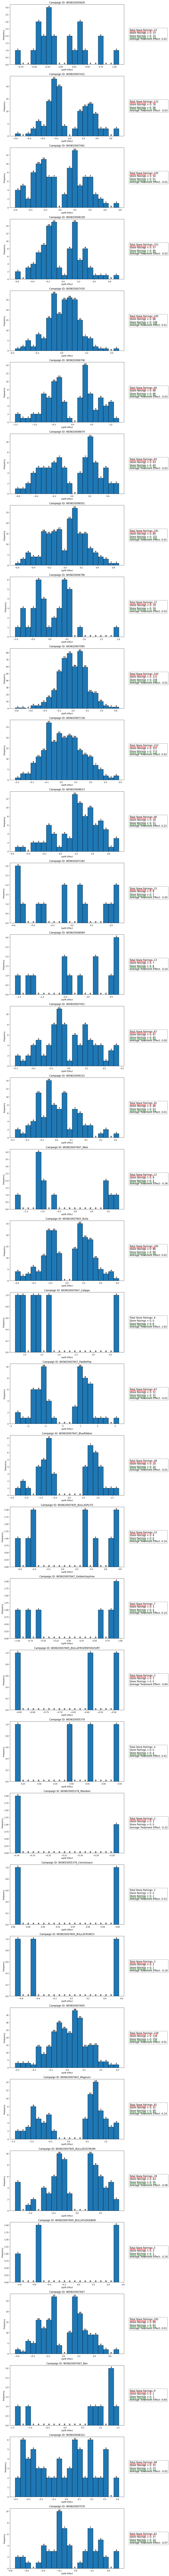

In [37]:
# Get the unique campaign_ids
campaign_ids = data['campaign_id'].unique()

# Set up the plotting grid
num_campaigns = len(campaign_ids)
fig, axes = plt.subplots(num_campaigns, 1, figsize=(12, num_campaigns * 5))

# If there is only one campaign, axes won't be an array
if num_campaigns == 1:
    axes = [axes]

# Plot a histogram for each campaign_id
for ax, campaign_id in zip(axes, campaign_ids):
    campaign_data = data[data['campaign_id'] == campaign_id]
    
    # Plot the histogram
    counts, bins, patches = ax.hist(campaign_data['uplift_effect'], bins=20, edgecolor='black')
    ax.set_title(f'Campaign ID: {campaign_id}')
    ax.set_xlabel('Uplift Effect')
    ax.set_ylabel('Frequency')
    
    # Add frequency labels on top of each bar
    for count, patch in zip(counts, patches):
        ax.text(patch.get_x() + patch.get_width() / 2, count, f'{int(count)}', 
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # Calculate the number of store pairings with < 0 and > 0 uplift effects
    num_less_than_zero = (campaign_data['uplift_effect'] < 0).sum()
    num_greater_than_zero = (campaign_data['uplift_effect'] > 0).sum()
    total_pairings = len(campaign_data)
    avg_treatment_effect = campaign_data['uplift_effect'].mean()
    
    # Create the text for the box
    textstr = (
        f'Total Store Pairings: {total_pairings}\n'
        f'Store Pairings < 0: {num_less_than_zero}\n'
        f'Store Pairings > 0: {num_greater_than_zero}\n'
        f'Average Treatment Effect: {avg_treatment_effect:.2f}'
    )
    
    # Create properties for the text box
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    
    # Position the text box
    ax.text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='center', bbox=props, color='black')

    # Set color for the text based on condition
    if num_less_than_zero > 0:
        ax.text(1.05, 0.55, f'Store Pairings < 0: {num_less_than_zero}', 
                transform=ax.transAxes, fontsize=12, color='red', verticalalignment='center')
    if num_greater_than_zero > 0:
        ax.text(1.05, 0.45, f'Store Pairings > 0: {num_greater_than_zero}', 
                transform=ax.transAxes, fontsize=12, color='green', verticalalignment='center')

plt.tight_layout()
plt.show()

In [43]:
check = client.query(
"""
WITH 
step_one AS (
    SELECT DISTINCT
        res.*, 
        n_days.n_days_campaign_period, 
        n_days.n_days_pre_period, 
        baskets_test.total_baskets_pre_period AS test_store_baskets_pre_period, 
        baskets_test.total_baskets_campaign_period AS test_store_baskets_campaign_period,
        baskets_control.total_baskets_pre_period AS control_store_baskets_pre_period, 
        baskets_control.total_baskets_campaign_period AS control_store_baskets_campaign_period,
        baskets_test.total_baskets_pre_period / n_days.n_days_pre_period AS test_store_transactions_per_day_pre_period,
        baskets_test.total_baskets_campaign_period / n_days.n_days_pre_period AS test_store_transactions_per_day_campaign_period,
        baskets_control.total_baskets_pre_period / n_days.n_days_pre_period AS control_store_transactions_per_day_pre_period,
        baskets_control.total_baskets_campaign_period / n_days.n_days_pre_period AS control_store_transactions_per_day_campaign_period
    FROM gcp-wow-cart-data-dev-d4d7.davide.instore_digital_screens_comparisons_store_level res
    LEFT JOIN (SELECT campaign_id, MAX(n_days_campaign_period) AS n_days_campaign_period, MAX(n_days_pre_period) AS n_days_pre_period FROM gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period GROUP BY 1) n_days
        ON res.campaign_id = n_days.campaign_id
    LEFT JOIN gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period AS baskets_test 
        ON baskets_test.campaign_id = res.campaign_id 
        AND baskets_test.Site = res.test_store 
    LEFT JOIN gcp-wow-cart-data-dev-d4d7.davide.instore_screens_sales_pre_vs_during_period AS baskets_control 
        ON baskets_control.campaign_id = res.campaign_id 
        AND baskets_control.Site = res.control_store 
),
one_observation_per_control_store_and_campaign_step_one AS (
    SELECT 
        campaign_id, 
        test_store,
        control_store, 
        ROW_NUMBER() OVER(PARTITION BY campaign_id, control_store ORDER BY control_store) AS n_control_store_observation
    FROM step_one
),
one_observation_per_control_store_and_campaign_step_two AS (
    SELECT 
        step_one.* 
    FROM step_one 
    LEFT JOIN one_observation_per_control_store_and_campaign_step_one
        ON step_one.campaign_id = one_observation_per_control_store_and_campaign_step_one.campaign_id 
        AND step_one.test_store = one_observation_per_control_store_and_campaign_step_one.test_store 
        AND step_one.control_store = one_observation_per_control_store_and_campaign_step_one.control_store
    WHERE one_observation_per_control_store_and_campaign_step_one.n_control_store_observation = 1
),
filtered AS (
    SELECT
        campaign_id,
        test_store,
        control_store,
        test_store_baskets_pre_period,
        test_store_baskets_campaign_period,
        control_store_baskets_pre_period,
        control_store_baskets_campaign_period,
        test_store_uplift,
        control_store_uplift,
        uplift_effect,
        -- Set minimum sample size thresholds
        CASE
            WHEN test_store_baskets_pre_period >= 50
            AND test_store_baskets_campaign_period >= 50
            AND control_store_baskets_pre_period >= 50
            AND control_store_baskets_campaign_period >= 50
            THEN 1
            ELSE 0
        END AS meets_sample_size
    FROM
        one_observation_per_control_store_and_campaign_step_two
    WHERE 
        -- Filter pairings based on minimum sample size thresholds
        test_store_baskets_pre_period >= 50
        AND test_store_baskets_campaign_period >= 50
        AND control_store_baskets_pre_period >= 50
        AND control_store_baskets_campaign_period >= 50
),
stats AS (
    SELECT
        campaign_id,
        test_store,
        control_store,
        test_store_baskets_pre_period,
        test_store_baskets_campaign_period,
        control_store_baskets_pre_period,
        control_store_baskets_campaign_period,
        test_store_uplift,
        control_store_uplift,
        uplift_effect,
        meets_sample_size,
        -- Calculate the pooled standard deviation of sales uplifts
        SQRT(
            ((test_store_baskets_pre_period - 1) * POW(test_store_uplift, 2) +
            (test_store_baskets_campaign_period - 1) * POW(test_store_uplift, 2) +
            (control_store_baskets_pre_period - 1) * POW(control_store_uplift, 2) +
            (control_store_baskets_campaign_period - 1) * POW(control_store_uplift, 2)) /
            (test_store_baskets_pre_period + test_store_baskets_campaign_period + control_store_baskets_pre_period + control_store_baskets_campaign_period - 4)
        ) AS pooled_std_dev,
        -- Calculate the standard error of the treatment effect
        SQRT(
            (POW(test_store_uplift, 2) / test_store_baskets_pre_period) +
            (POW(test_store_uplift, 2) / test_store_baskets_campaign_period) +
            (POW(control_store_uplift, 2) / control_store_baskets_pre_period) +
            (POW(control_store_uplift, 2) / control_store_baskets_campaign_period)
        ) AS standard_error
    FROM
        filtered
    WHERE
        meets_sample_size = 1
),
power_calculations AS (
    SELECT
        *,
        -- Calculate Minimum Detectable Effect (MDE) for each pairing
        (1.96 + 0.842) * standard_error AS mde
    FROM
        stats
),
sufficiently_powered_pairings AS (
    SELECT
        campaign_id,
        test_store,
        control_store,
        test_store_baskets_pre_period,
        control_store_baskets_pre_period,
        test_store_baskets_campaign_period,
        control_store_baskets_campaign_period,
        uplift_effect,
        standard_error,
        CASE
            WHEN ABS(uplift_effect) >= (1.96 + 0.842) * standard_error THEN 1
            ELSE 0
        END AS is_sufficiently_powered
    FROM
        power_calculations
),
filtered_campaigns AS (
    SELECT 
        campaign_id, 
        COUNT(*) AS num_sufficiently_powered_pairings
    FROM 
        sufficiently_powered_pairings
    WHERE 
        is_sufficiently_powered = 1
    GROUP BY 
        campaign_id
    HAVING 
        COUNT(*) >= 30  -- Set your minimum threshold here
)
SELECT * 
FROM 
    sufficiently_powered_pairings 
WHERE 
    campaign_id IN (SELECT campaign_id FROM filtered_campaigns) 
    AND is_sufficiently_powered = 1;
"""
).result()
check_df = check.to_dataframe()
chime.success()
check_df

,campaign_id,test_store,control_store,test_store_baskets_pre_period,control_store_baskets_pre_period,test_store_baskets_campaign_period,control_store_baskets_campaign_period,uplift_effect,standard_error,is_sufficiently_powered
0,WOW20006501,2890,2661,497,407,638,570,-0.156621846,0.040551350,1
1,WOW20007078,1184,2077,157,108,193,167,-0.211407240,0.037154865,1
2,WOW20007085,4306,2842,488,399,641,478,0.068339983,0.015182655,1
3,WOW20007085,4621,3672,460,906,648,1159,-0.053633206,0.004634113,1
4,WOW20007136,2558,1294,2059,3246,2314,4179,-0.142147674,0.005542743,1
...,...,...,...,...,...,...,...,...,...,...
2088,WOW20008109,3274,2670,206,266,287,384,-0.225989591,0.033077364,1
2089,WOW20008322,2760,1030,79,152,86,127,0.134947376,0.038747735,1
2090,WOW20008322,4394,1213,219,193,216,172,-0.030839475,0.004950758,1
2091,WOW20008322,1307,2072,107,119,88,114,-0.083756314,0.027226880,1


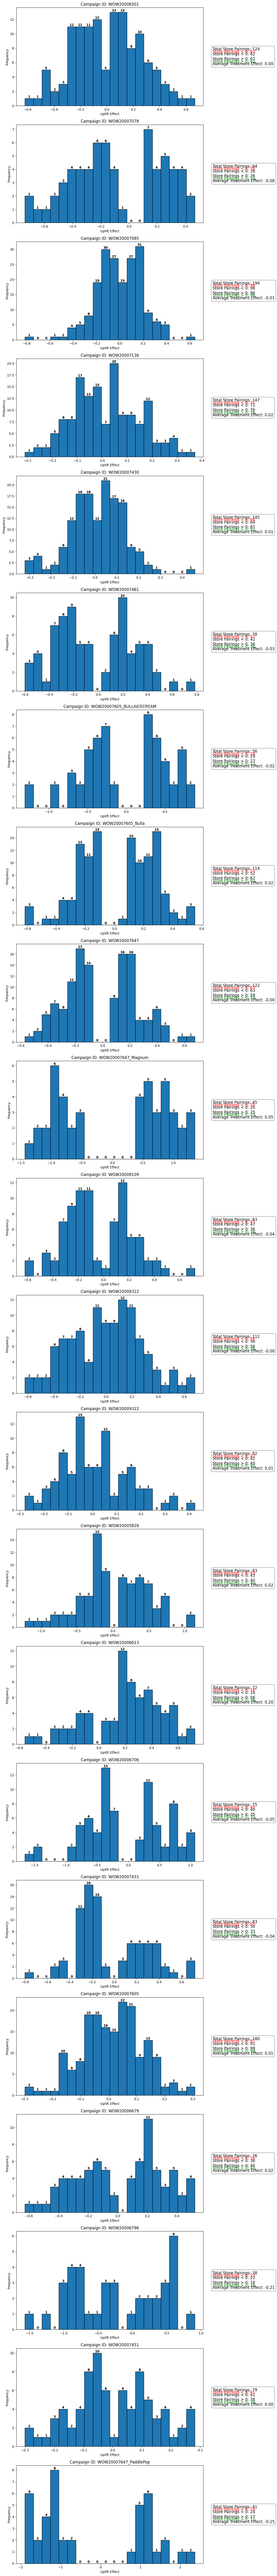

In [44]:

# Set minimum number of store pairings
min_pairings_threshold = 30

# Filter campaigns that meet the minimum number of sufficiently powered store pairings
filtered_campaigns = data.groupby('campaign_id').filter(lambda x: len(x) >= min_pairings_threshold)
campaign_ids = filtered_campaigns['campaign_id'].unique()

# Set up the plotting grid
num_campaigns = len(campaign_ids)
fig, axes = plt.subplots(num_campaigns, 1, figsize=(12, num_campaigns * 5))

# If there is only one campaign, axes won't be an array
if num_campaigns == 1:
    axes = [axes]

# Plot a histogram for each campaign_id
for ax, campaign_id in zip(axes, campaign_ids):
    campaign_data = filtered_campaigns[filtered_campaigns['campaign_id'] == campaign_id]
    
    # Plot the histogram
    counts, bins, patches = ax.hist(campaign_data['uplift_effect'], bins=20, edgecolor='black')
    ax.set_title(f'Campaign ID: {campaign_id}')
    ax.set_xlabel('Uplift Effect')
    ax.set_ylabel('Frequency')
    
    # Add frequency labels on top of each bar
    for count, patch in zip(counts, patches):
        ax.text(patch.get_x() + patch.get_width() / 2, count, f'{int(count)}', 
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # Calculate the number of store pairings with < 0 and > 0 uplift effects
    num_less_than_zero = (campaign_data['uplift_effect'] < 0).sum()
    num_greater_than_zero = (campaign_data['uplift_effect'] > 0).sum()
    total_pairings = len(campaign_data)
    avg_treatment_effect = campaign_data['uplift_effect'].mean()
    
    # Create the text for the box
    textstr = (
        f'Total Store Pairings: {total_pairings}\n'
        f'Store Pairings < 0: {num_less_than_zero}\n'
        f'Store Pairings > 0: {num_greater_than_zero}\n'
        f'Average Treatment Effect: {avg_treatment_effect:.2f}'
    )
    
    # Create properties for the text box
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    
    # Position the text box
    ax.text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='center', bbox=props, color='black')

    # Set color for the text based on condition
    if num_less_than_zero > 0:
        ax.text(1.05, 0.55, f'Store Pairings < 0: {num_less_than_zero}', 
                transform=ax.transAxes, fontsize=12, color='red', verticalalignment='center')
    if num_greater_than_zero > 0:
        ax.text(1.05, 0.45, f'Store Pairings > 0: {num_greater_than_zero}', 
                transform=ax.transAxes, fontsize=12, color='green', verticalalignment='center')

plt.tight_layout()
plt.show()